# Analysis and prediction of default payments by credit card holders.

<a class="anchor" id="toc"></a>
## Table of contents

1. [Introduction](#wstep)<br>
2. [Model evaluation and selection of the optimal cut-off point - business assumptions](#zalozenia)<br>    
3. [Description of the data set](#zbior)<br>
4. [Load libraries](#biblioteki)<br>
5. [Upload data](#wczytanie)<br>
6. [Initial data analysis and preparation](#format)<br>
7. [Data set analysis](#analiza)
    1. [Numerical features](#a_num)
    2. [Categorical features](#a_kat)
    3. [Dependent variables](#z_celu)<br>
8. [Dependency analysis](#a_zal)
    1. [Numerical, categorical - ordinal features and dependent variable](#num_celu)
    2. [Categorical - nominal features and dependent variable](#kat_celu)<br>            
9. [Additional analysis](#dodatkowe)<br>
10. [Preparation of data for modeling](#przygotowanie)
    1. [Removal of outlier values](#odstajace)
    2. [Hot-one encoding of nominal categorizing features](#kodowanie)
    3. [Division into training and test set](#podzial)
    4. [Categorization of features](#kategoryzacja)    
    5. [Selection of features](#dobor_kat)<br>
11. [Logistic Regression model](#model)
    1. [Model building](#budowa)
    2. [Evaluation of the model for the validation set](#ocena)<br>
12. [Final verification of the Logistic Regression model](#model_fin)
    1. [Final model](#budowa_fin)
    2. [Evaluation of the model for the test set](#ocena_fin)
    3. [Determination of the optimal cut-off point](#punkt)
    4. [Model evaluation in terms of the optimal cut-off point](#ocena_punkt)
    5. [Summary of results and determination of profitability](#rentownosc)
    6. [Determination of income for other gains and losses for the model based on logistic regression](#inne_doch)<br>
13. [XGBoost model](#model_xgb)
    1. [Optimization of model hyperparameters](#hiperparametry_xgb)
    2. [Model building](#budowa_xgb)
    3. [Evaluation of the model for the validation set](#ocena_xgb)<br>
14. [Final verification of the XGBoost model](#model_fin_xgb)
    1. [Final model](#budowa_fin_xgb)
    2. [Evaluation of the model for the test set](#ocena_fin_xgb)
    3. [Determination of the optimal cut-off point](#punkt_xgb)
    4. [Model evaluation in terms of the optimal cut-off point](#ocena_punkt_xgb)
    5. [Summary of results and determination of profitability](#rentownosc_xgb)
    6. [Determination of income for other gains and losses for the model based on logistic regression](#inne_doch_xgb)   
15. [Comparison of model income based on logistic regression and XGBoost](#porownanie_doch)<br>
16. [Summary and conclusions](#podsumowanie)<br> 

[Additional models](#modele_dodatkowe)<br> 
1. [Decision tree model](#model_tree)<br> 
2. [Random forest model](#model_rf)<br> 
3. [LightGBM model](#model_light)<br> 
4. [CATBoost model](#model_cat)<br> 
5. [Comparison of the income achieved by additional models](#porownanie_doch_dodatkowe)<br>

<a class="anchor" id="wstep"></a>
## Wstęp
The aim of the project is to create a predictive model that will allow to determine the occurrence of default payments by credit card holders who are clients of a large commercial bank in Taiwan operating on the loan market, including issuing credit cards for its customers. The task is to optimize the bank's income from existing customers who have a credit card. The company has the data of 30,000 customers. Based on the analysis of the bank's customer data, the prediction of the probability of default in the next month will be made. Then, based on business conditions, a probability level (cut-off point) will be selected for which the client will be classified as credible / not credible client. The cut-off point should be selected to maximize the bank's income from the entire loan portfolio.<br>
The results of the analysis in addition to the predict of default payments by customers due next month on the current credit card can be used to evaluate an application for a new credit card and used to make an overall assessment of the credibility of the customer, eg. when granting consumer credit or other offers for the adjustment of banking products.<br>
Due to the guidelines of the supervisory authorities (KNF) on the use of predictive models by financial institutions, a fully interpretable model should be used. Additionally, data transformation should be limited and the number of features (dimensionality) should be limited as much as possible (without losing the model's effectiveness) to avoid overtraining the model.<br>
To implement a predictive model for classifying credible or not credible customers, preliminary analysis and initial data processing will be performed for the available customer dataset. Then, the features values will be transformed for the proper operation of the algorithms and the dimensionality of the model will be limited by selecting the best features for modelling. A logistic regression algorithm will be used to perform the basic predictive model. Additionally, for comparison purposes, an additional model will be made based on the XGBoost algorithm. Based on the results achieved, taking into account general modeling indicators and business conditions, a comparison of models and an assessment of their effectiveness will be presented. A comparison of models will be presented and the assessment of their effectiveness based on the achieved results, taking into account general modeling indicators and business conditions.
***
For testing purposes, models based on the decision tree algorithm, random forests, LightGBM, CatBoost, etc. will also be made.


<a class="anchor" id="zalozenia"></a>
## Model evaluation and selection of the optimal cut-off point - business assumptions
[Back to the table of contents](#toc)

In the process of model verification for actual results, it is important to select the appropriate level of probability of belonging to the class, the so-called cut-off point. In the credit scoring process its level affects the number of customers classified as unreliable (default), which determines the income of the bank's entire loan portfolio. <br>
Too high a cut-off point will result in only a few cases with a very high level of probability being classified as positive. This could result in an increase in the number of clients that were incorrectly classified as False Negative and could result in large losses for the bank. Accordingly, too small value will cause the majority of cases, with a small probability level will be classified as positive. As a result, large numbers of customers will be misclassified as False Positive and the bank will lose its potential profit from credible customers. <br>
In order to select the cut-off point, the bank's profits and losses due to the specific decision made when granting a credit card will be taken into account. The following functions of income that will be maximized were assumed:

**income = profit - loss**

During the credit card issuing process, a bank employee may decide to grant or deny a credit card to a customer
The positive case is the event of default by the bank's customer {1} and the repayment for the negative event {0}. <br>
As a result of making a certain decision, the following situations may occur:
* True Negative: the granting of a credit card and paying off debt
* False Negative: the granting of a credit card and debt default
* True Positive: not granting of a credit card debt default
* False Positive: not granting of a credit card and paying off debts

So the True Negative situation is the credible customer expected, and False Negative is the expected customer who has actually harmed the company. Taking a specific decision affects the bank's profit or loss. <br>
To simplify the calculation and comparative analysis of the income generated by the model, it was assumed that in the case of a positive {1}, the bank would incur a specific loss equal to L. However, for negative {0}, the bank will earn an amount equal to P. For P and L, appropriate values in the range from 0 to 100 should be taken, assuming that you can gain and lose up to 100%, with 100% being the average value of the loan granted.<br> 
Based on the above data, the following assumptions were made for individual decisions:
* True Negative: the bank will earn, P = 15 (profit on granting the loan and commission on selling the loan),
* False Negative: the bank will lose, L = 50 (average loss) (it is assumed that the bank will partially recover the amount borrowed and earn commission on the sale of the loan),
* True Positive: the bank neither earns nor loses (will not be taken into account),
* False Positive: the bank neither earns nor loses (it will not be taken into account, it is assumed that the lost profits will not be taken into account due to the card not being granted to the customer).

In this case, the simplified formula for the value of income for the entire portfolio will be:

**income = TN (number of reliable customers) * P - FN (number of default) * L**

So ultimately, the income function that will be maximized is:

**income = TN * 15 - FN * 50 -> max**

As a result, you can easily determine the average profitability of the entire process of granting credit. It is the average income for the total number of loans granted, according to the formula below:

**profitability = income / number of loans granted**

Then compare the profitability of different models without the need to include specific values dependent on the economic situation and policies of the bank.

***
*Additionally in order to facilitate the comparative analysis of the income obtained by the model and the lack of precise knowledge about the actual costs and profits of lending activities, a simplified income calculation was used. The adopted assumptions do not take into account several factors that may affect the actual result. Additionally, the final result should include e.g. variable costs of servicing and granting a loan, the impact of not granting a credit card to a reliable person. Also, it may not be appropriate to assume that the bank will not recover 50% of the loan amount. Its level may be affected by the costs and effectiveness of customer debt collection. In addition, random events with a large impact on the performance of lending (e.g. a recession) can significantly change the actual result.*

<a class="anchor" id="zbior"></a>
## Description of the data set
[Back to the table of contents](#toc)

A publicly available data set from the website https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients was used to make the predictive model.<br>
The author of the data is I-Cheng Yeh from the Department of Information Management, Chung Hua University, Taiwan. The data concerns overdue payments by bank customers in Taiwan.

Data set description:
 - Number of observations: 30000,
 - Feature types: floating point numbers (Real), integers (Integer),
 - Number of features: 24,
 - Date added: 26.01.2016,
 - Lack of data: not occur.
 
Description original attributes present in the data set:
 - Y: dependent variable, defines default payment in the next month (1 = Yes, 0 = No),
 - X1: Amount of the given credit in NT dollar (Taiwan dollar)  (it includes both the individual consumer credit and his/her family credit.),
 - X2: Gender (1 = male; 2 = female),
 - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others),
 - X4: Marital status (1 = married; 2 = single; 3 = others).
 - X5: Age (year).
 - X6 - X11: History of past payment from April to September 2005, given as follows: X6 = the repayment status in September 2005 ... X11 = the repayment status in April 2005 (-1 = pay duly; 1 = payment delay for 1 month; 2 = payment delay for 2 month; ... ; 9 = payment delay for 9 month and more). Additionally, there are values -2 and 0, the interpretation of which is given as: -2 and 0 = there is no payment balance.
 - X12-X17: Amount of bill statement in NT dollar (X12 = amount of bill statement in September 2005; X13 = amount of bill statement in August 2005; ... ; X17 = amount of bill statement in April 2005),
 - X18-X23: Amount of previous payment in NT dollar (X18 = amount paid in September 2005, X19 = amount paid in August 2005; ... ; X23 = amount paid in April 2005).
 ***
*Due to the lack of information provided in the dataset description, it was assumed that a default payment would be predicted for October 2005, as the latest data is from September 2005. Additionally, the dataset description does not provide information on the conditions of the default.<br>
It should also be noted that we have data of customers who are already bank customers and have a specific loan repayment history, and when analyzing a new data set, this should be taken into account.*

<a class="anchor" id="biblioteki"></a>
## Load libraries
[Back to the table of contents](#toc)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm_api
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from catboost import CatBoostClassifier

<a class="anchor" id="wczytanie"></a>
## Upload data
[Back to the table of contents](#toc)

In [3]:
plik = pd.ExcelFile('data/default_of_credit_card_clients.xls') #load file .xls
df = plik.parse('Data') #convert excel table into data frame 
df #original data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#loading data again with column name change to make it easier to analyze and interpret 
#and delete 1 line
df = plik.parse('Data', skiprows=1, names = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 
                                             'MARRIAGE', 'AGE', 'PAY_DEL_SEP', 'PAY_DEL_AUG',
                                             'PAY_DEL_JUL', 'PAY_DEL_JUN', 'PAY_DEL_MAY', 
                                             'PAY_DEL_APR', 'BILL_SEP', 'BILL_AUG', 
                                             'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 
                                             'BILL_APR', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 
                                             'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'Y']) 
                                            
df.drop('ID', axis = 1, inplace = True) #removing the id column so that there are no two columns with ordinal values 
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_DEL_SEP,PAY_DEL_AUG,PAY_DEL_JUL,PAY_DEL_JUN,PAY_DEL_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.sample(10) #selecting random row of data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_DEL_SEP,PAY_DEL_AUG,PAY_DEL_JUL,PAY_DEL_JUN,PAY_DEL_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,Y
27885,80000,2,3,1,27,0,0,0,0,0,...,6402,4950,4661,3028,1241,3010,2025,3500,26028,1
5546,30000,2,2,1,24,0,0,0,0,0,...,22893,3332,3400,1748,1310,490,67,68,0,0
24114,300000,1,2,1,29,0,0,0,0,0,...,27299,0,0,3000,5000,21312,0,0,0,0
28230,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,0,980,0,0,0,238,0
17863,30000,1,2,2,26,1,3,2,2,2,...,15424,14881,15894,0,0,2226,0,1406,0,1
27719,20000,2,1,2,24,-1,-1,-1,-1,-1,...,440,440,440,4023,440,440,440,440,440,0
3423,60000,2,3,1,43,0,0,0,0,0,...,30368,29667,30159,3000,1700,1135,1100,1500,1200,1
15119,20000,1,3,1,56,1,2,2,2,2,...,12241,11748,12456,1000,900,2000,0,900,3200,1
15692,80000,1,2,2,26,0,0,-1,-1,-1,...,180,-210,220,0,500,500,0,820,500,0
12624,170000,2,2,2,27,0,0,0,0,0,...,38803,40259,41541,3000,3000,2308,3000,3000,1800,0


<a class="anchor" id="format"></a>
## Initial data analysis and preparation
[Back to the table of contents](#toc)

Checking the compliance of the data set with the description:

In [6]:
print ('Number of observations:',df.shape[0],'\n')
print('Types of features :\n',df.dtypes,'\n')
print ('Number of features:',df.shape[1],'\n')
print ('Lack of data:',df.isnull().any().any(),'\n')
print ('Number of duplicate data:',df.duplicated().sum(),'\n')

Number of observations: 30000 

Types of features :
 LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_DEL_SEP    int64
PAY_DEL_AUG    int64
PAY_DEL_JUL    int64
PAY_DEL_JUN    int64
PAY_DEL_MAY    int64
PAY_DEL_APR    int64
BILL_SEP       int64
BILL_AUG       int64
BILL_JUL       int64
BILL_JUN       int64
BILL_MAY       int64
BILL_APR       int64
PAY_SEP        int64
PAY_AUG        int64
PAY_JUL        int64
PAY_JUN        int64
PAY_MAY        int64
PAY_APR        int64
Y              int64
dtype: object 

Number of features: 24 

Lack of data: False 

Number of duplicate data: 35 



Removal of duplicate data

In [7]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace = True)

Change of the values of nominal categorizing attributes * `EDUCATION` *, *`MARRIAGE` *, * `SEX` * from numeric to text for further analysis. 

In [8]:
df.SEX.replace([1,2], ['man','woman'], inplace = True)

df.EDUCATION.replace([0, 1, 2, 3, 4, 5, 6], ['unknown', 'graduate_school', 'university', 'high_school', 
                                                 'others', 'unknown', 'unknown'], inplace = True)
df.MARRIAGE.replace([0, 1, 2, 3], ['unknown', 'married', 'single', 'others'], inplace = True)

There is also an ordinal categorizing attribute in the data set (their values appear in a strictly defined order) that defines the repayment status in individual months (* `PAY_DEL_SEP` *, *` PAY_DEL_AUG` *, * `PAY_DEL_JUL` *, etc.). For these attributes, numerical values will be retained for analysis, because their values are important and affect the operation of the model. The other attributes are numeric. 

<a class="anchor" id="analiza"></a>
## Data set analysis
[Back to the table of contents](#toc)

<a class="anchor" id="a_num"></a>
### Numerical features

Before starting to create the model, an analysis of the attribute values was performed.
First, the general characteristics of the numerical attributes were checked. Basic statistics describing particular attributes of a given data set have been determined.

In [9]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_DEL_SEP', 'PAY_DEL_AUG',
    'PAY_DEL_JUL', 'PAY_DEL_JUN', 'PAY_DEL_MAY','PAY_DEL_APR','Y']].describe()

,LIMIT_BAL,AGE,PAY_DEL_SEP,PAY_DEL_AUG,PAY_DEL_JUL,PAY_DEL_JUN,PAY_DEL_MAY,PAY_DEL_APR,Y
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,0.221258
std,129760.135222,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,0.415101
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [10]:
df[[ 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY','BILL_APR', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 
    'PAY_JUN', 'PAY_MAY', 'PAY_APR', ]].describe()

,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


For the `LIMIT_BAL`, the standard deviation is very large: 129748 with the mean of 167484. The mean `AGE` is 35.5 years with the standard deviation of 9.2, but there are also older people. Most of the `PAY_DEL` are on time. The average `BILL` increases in the following months and the standard deviation is significant, e.g. for September it amounts to 73636 with the average being 51223 (it is related to the amount of credit limits). Similarly, the average `PAY` increases over time and the standard deviation is very large, e.g. for September it is 16563 with an average of 5664. 

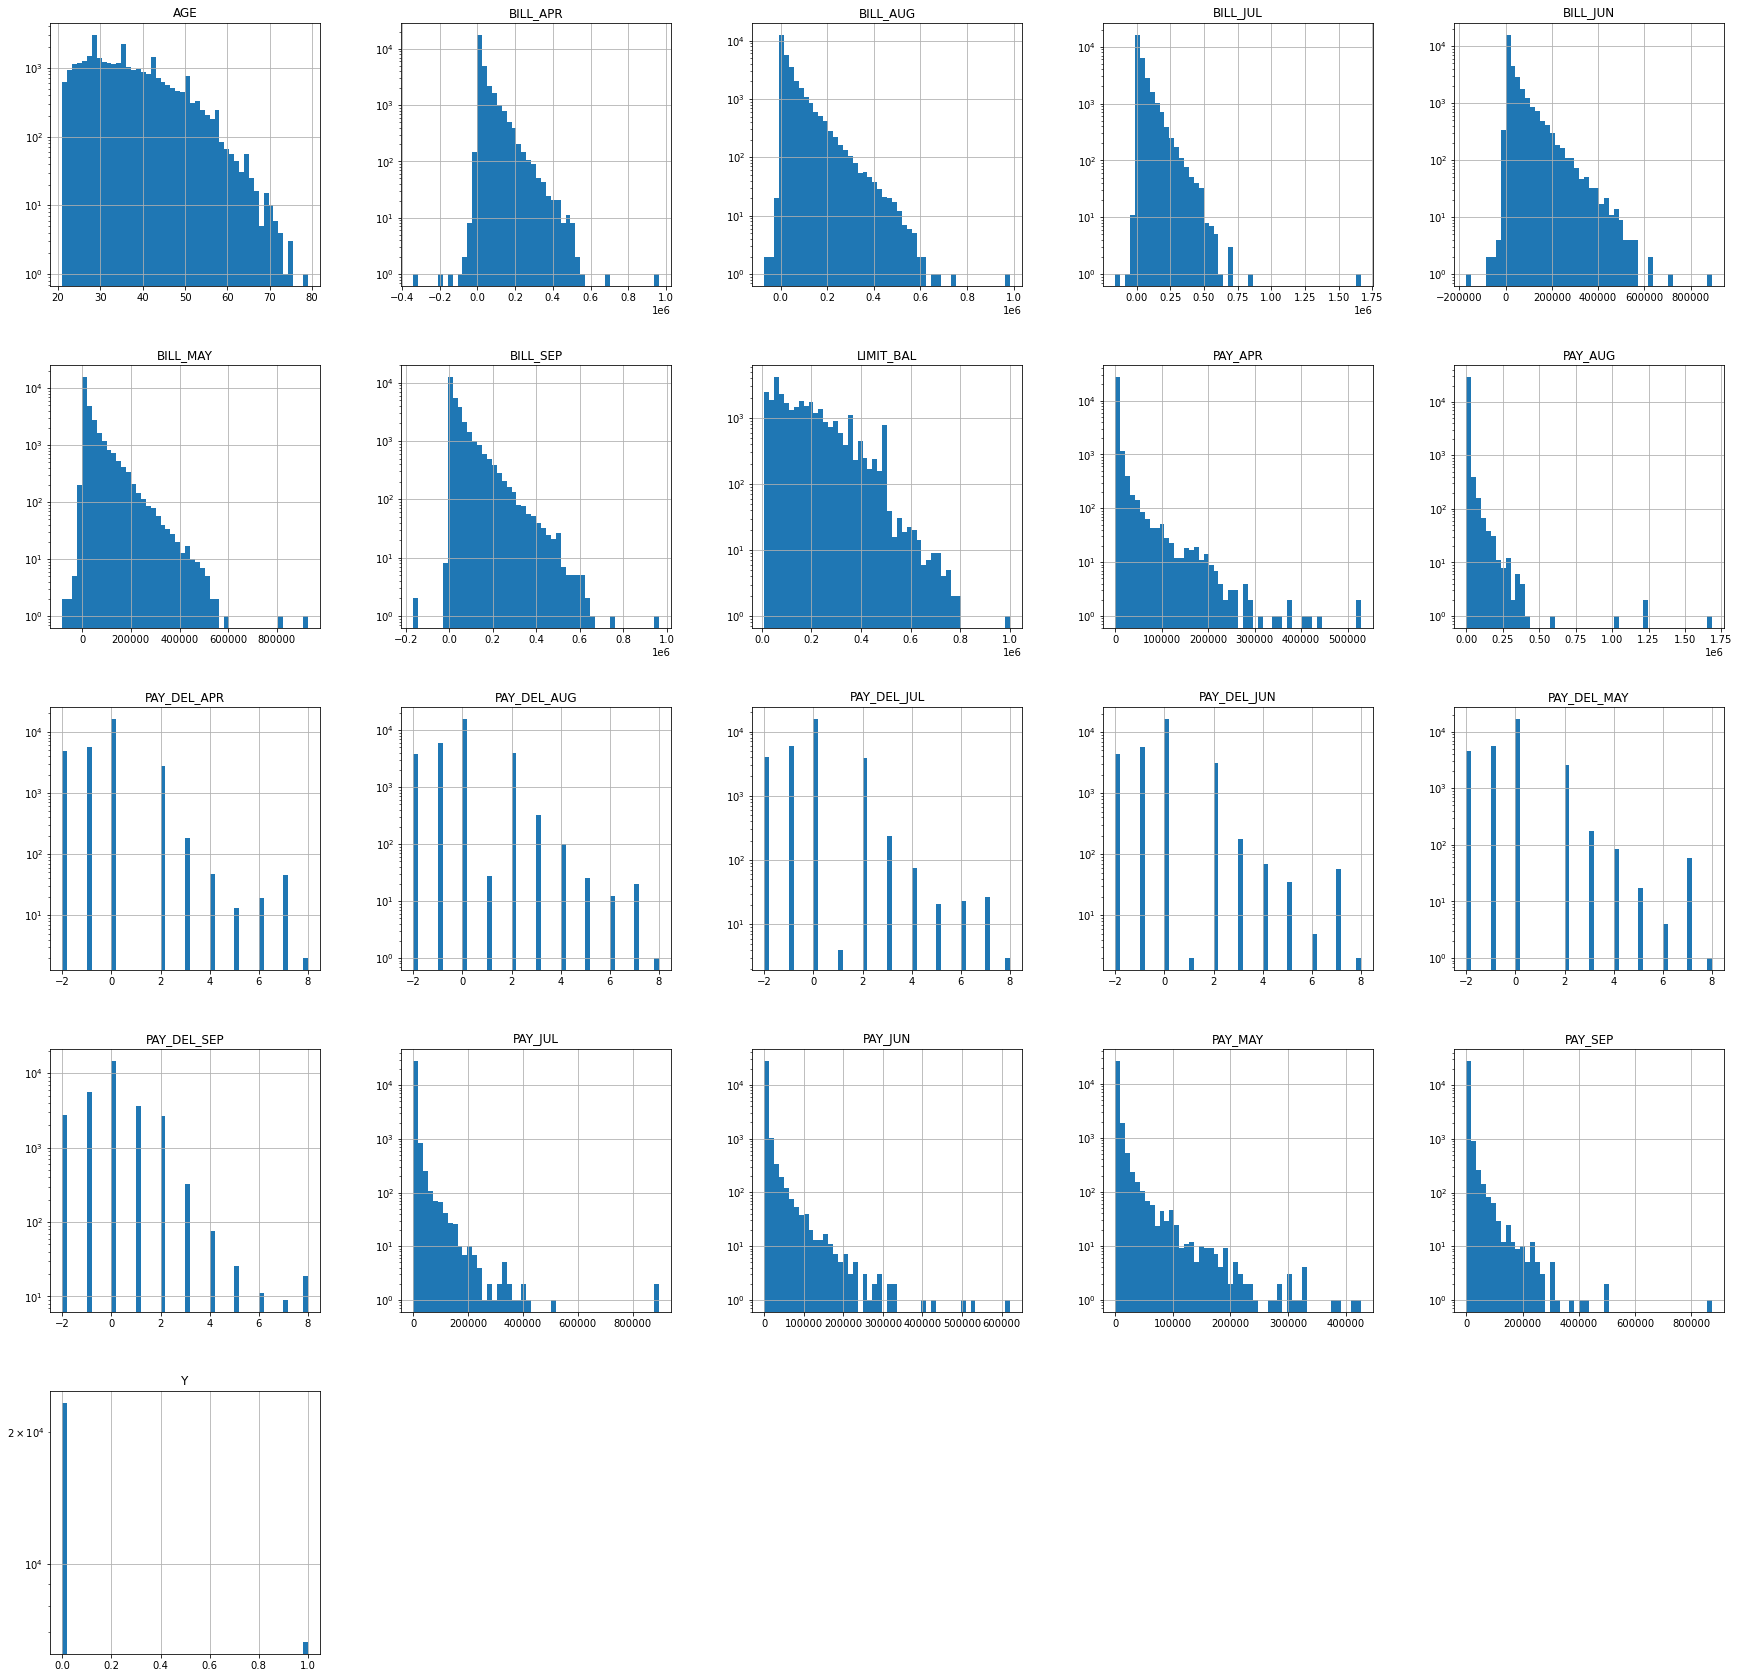

In [11]:
df.hist(figsize=(30,30), bins=50, log=True);

#### Analysis of numerical features in terms of value distribution and, if necessary, indication of outliers.

##### `LIMIT_BAL`

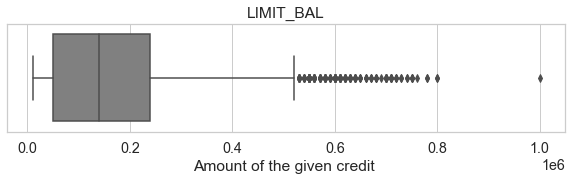

Feature is not normally distributed


In [12]:
plt.figure(figsize=(10,2))
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(df['LIMIT_BAL'],palette = ['gray']).set(title = 'LIMIT_BAL', xlabel = 'Amount of the given credit ')
plt.show()

if(scipy.stats.normaltest(df['LIMIT_BAL'])[1] < 0.05): #Normal distribution test 
    print('Feature is not normally distributed')
else:
    print('Feature is normally distributed')

The distribution is right-skewed. Most of the limits on the card are smaller than around 250,000. There are several outliers, including one value much higher than the others - 1,000,000. 

##### `AGE`

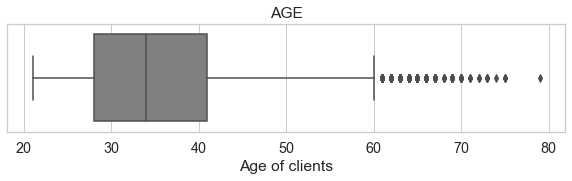

Feature is not normally distributed


In [13]:
plt.figure(figsize=(10,2))
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(df['AGE'],palette = ['gray']).set(title = 'AGE', xlabel = 'Age of clients')
plt.show()

if(scipy.stats.normaltest(df['AGE'])[1] < 0.05): #Normal distribution test 
    print('Feature is not normally distributed')
else:
    print('Feature is normally distributed')

The distribution is right-skewed. Most of the clients are middle-aged, but there are also a few people of retirement age. 

##### `Amount of bill statement (BILL_APR - BILL_SEP)`

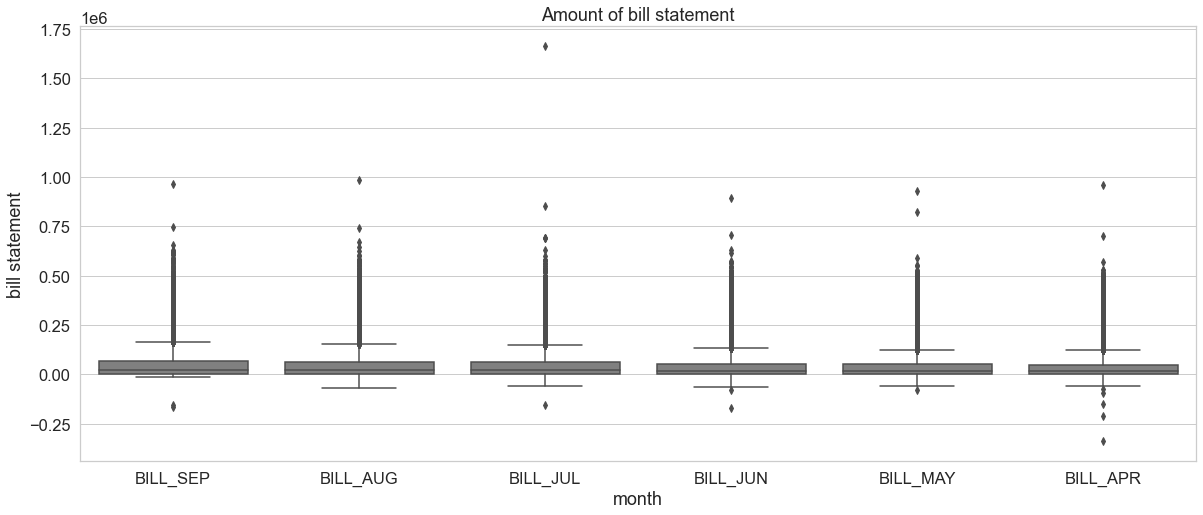

In [14]:
#All the features of the amount of bill statement
bill_statement = pd.melt(df, value_vars=[ 'BILL_SEP', 'BILL_AUG','BILL_JUL', 'BILL_JUN', 'BILL_MAY', 
                                  'BILL_APR'], var_name=['month'], value_name = 'bill statement') 
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5, style="whitegrid")
sns.boxplot(data = bill_statement, y = 'bill statement', x = 'month', palette = ['gray']).set(title = 'Amount of bill statement')
plt.show()


The distribution is right-skewed and not normally distributed. Most of the values in the statement are less than about 200 000, but there are also outliers.

##### `Amount of previous payment  (PAY_APR - PAY_SEP)`

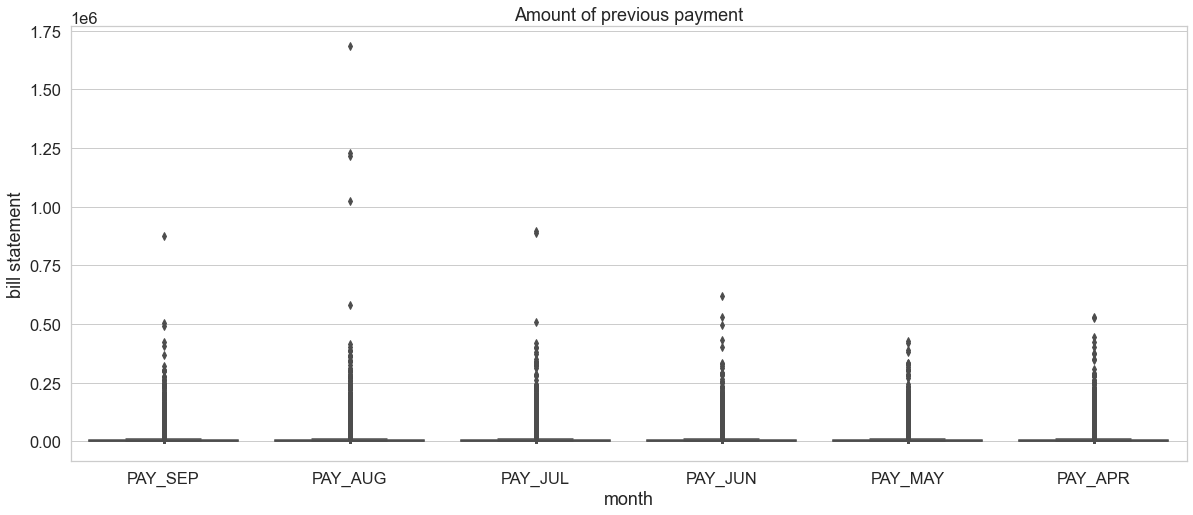

In [15]:
#All the features of the amount of previous payment
previous_payment = pd.melt(df, value_vars=['PAY_SEP', 'PAY_AUG', 'PAY_JUL','PAY_JUN', 'PAY_MAY',
                                    'PAY_APR'], var_name=['month'], value_name = 'bill statement') 
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5, style="whitegrid")
sns.boxplot(data = previous_payment, y = 'bill statement', x = 'month', palette = ['gray'])\
   .set(title = 'Amount of previous payment')
plt.show()


The distribution is right-skewed and not normally distributed. Most of the values in the statement are less than about 100 000, but there are also outliers.

Summarizing on the basis of the above analysis, it can be concluded that all numerical attributes have outliers and do not have normal distributions (their distributions have skews).
The above conclusions will be used in the selection of further analysis methods.


<a class="anchor" id="a_kat"></a>
### Categorical features

### Ordinal

##### `History of past payment (PAY_DEL_APR - PAY_DEL_SEP)`

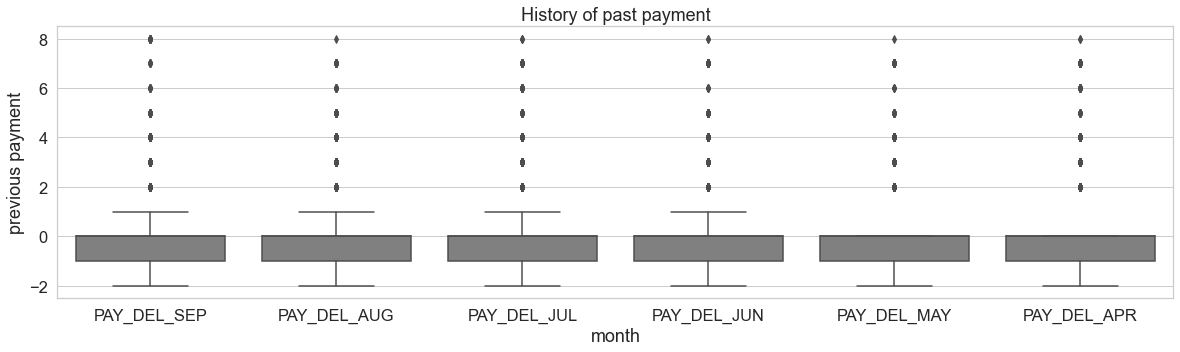

In [16]:
#All the features of the amount of previous payment
previous_payment = pd.melt(df, value_vars=[ 'PAY_DEL_SEP', 'PAY_DEL_AUG','PAY_DEL_JUL', 'PAY_DEL_JUN', 
                                        'PAY_DEL_MAY','PAY_DEL_APR'], var_name=['month'], value_name = 'previous payment') 
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5, style="whitegrid")
sns.boxplot(data = previous_payment, y = 'previous payment', x = 'month', palette = ['gray'])\
   .set(title = 'History of past payment')
plt.show()


Most of the debt is repaid on time (-1 value). However, there are cases in which the repayment extends up to several months and there are cases in which there is no balance of payments (values -2, 0).

### Nominal

In [17]:
#general comparison
df.select_dtypes(include = ['object']).describe()

,SEX,EDUCATION,MARRIAGE
count,29965,29965,29965
unique,2,5,4
top,woman,university,single
freq,18091,14019,15945


The table shows that the largest number of clients are women, the majority of clients are persons with graduate school and university, and the largest number of persons are single.

##### `SEX`

In [18]:
print(df['SEX'].value_counts(normalize = True))

woman    0.603738
man      0.396262
Name: SEX, dtype: float64


Most of the clients are women, about 60%.

##### `EDUCATION`

In [19]:
print(df['EDUCATION'].value_counts(normalize = True))

university         0.467846
graduate_school    0.352511
high_school        0.164025
unknown            0.011513
others             0.004105
Name: EDUCATION, dtype: float64


The vast majority of clients are people with graduate school and university. About 82% of clients in total.

##### `MARRIAGE`

In [20]:
print(df['MARRIAGE'].value_counts(normalize = True))

single     0.532121
married    0.455298
others     0.010779
unknown    0.001802
Name: MARRIAGE, dtype: float64


Most of the clients are single persons (approx. 53%), but also a large number are also married (approx. 46%). 

<a class="anchor" id="z_celu"></a>
### Dependent variable

In [21]:
print(df['Y'].value_counts(normalize = True))

0    0.778742
1    0.221258
Name: Y, dtype: float64


The number of defaults accounts for about 22% of all customers. The data set can be considered unbalanced. 

<a class="anchor" id="a_zal"></a>
## Dependency analysis
[Back to the table of contents](#toc)

<a class="anchor" id="num_celu"></a>
### Numerical, categorical ordinal features and dependent variable

The Spearman rank method was used to test the correlation. 

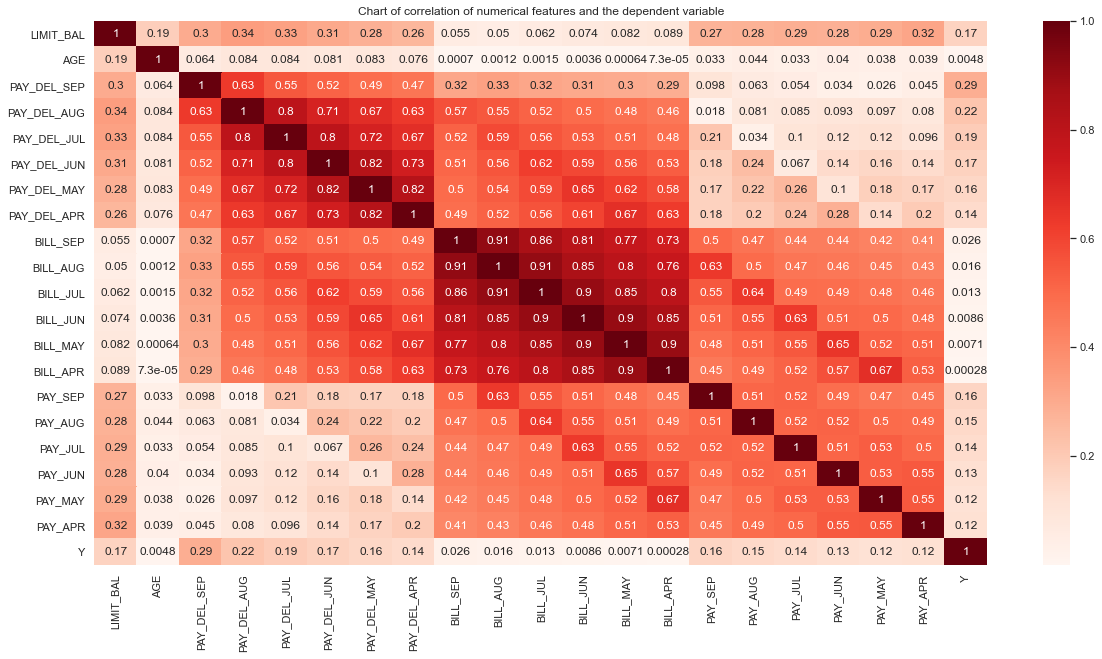

In [22]:
korelacja_num = pd.DataFrame(scipy.stats.spearmanr(df.drop([ 'SEX', 'EDUCATION', 'MARRIAGE'], axis = 1))[0],
columns = df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1).columns,
index = df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1).columns) #without categorizing attributes 

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.heatmap(korelacja_num.abs(), cmap="Reds", annot=True).set(title='Chart of correlation of numerical features and the dependent variable')
plt.show()

The features from the *`PAY_DEL`* group are most correlated with the dependent variable *`Y`*. The correlation increases with the approach to October.<br>
*`LIMIT_BAL`* and features from the *`PAY`* group slightly correlated with the dependent variable *`Y`*. <br>
*`AGE`* and the features from the *`BILL`* group are only slightly correlated with the dependent variable *`Y`*. <br> 
It seems obvious that the *`BILL`* is strongly correlated with *`PAY`*, and in particular depends on *`PAY` * in a given month and * `BILL`* in the following month. <br> 
*`Age`* has no correlation with any of the features (small with *` LIMIT_BAL`*). <br>


<a class="anchor" id="kat_celu"></a>
### Categorical nominal features and dependent variable

Y,0,1
EDUCATION,,
graduate_school,8531,2032
high_school,3678,1237
others,116,7
university,10691,3328
unknown,319,26


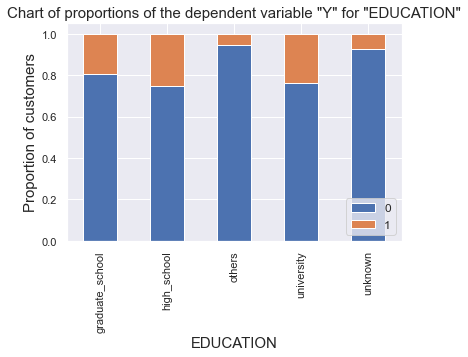

In [26]:
#Chart of proportions of the dependent variable "Y" for education 
edu_y=pd.crosstab(df.EDUCATION,df.Y)
edu_y.div(edu_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6, 4))

plt.title('Chart of proportions of the dependent variable "Y" for "EDUCATION"', fontsize=15)
plt.xlabel('EDUCATION', fontsize=15)
plt.ylabel('Proportion of customers', fontsize=15)
plt.legend(frameon=True,loc='lower right', fontsize=12)
edu_y

Y,0,1
SEX,,
man,9005,2869
woman,14330,3761


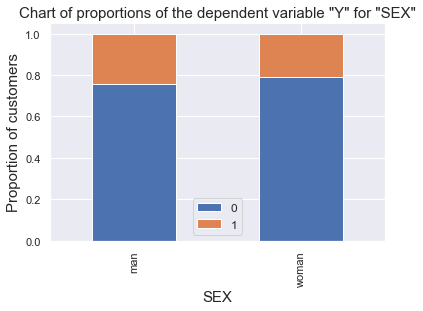

In [27]:
#Chart of proportions of the dependent variable "Y" for sex
sex_y=pd.crosstab(df.SEX,df.Y)
sex_y.div(sex_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6, 4))
plt.title('Chart of proportions of the dependent variable "Y" for "SEX"', fontsize=15)
plt.xlabel('SEX', fontsize=15)
plt.ylabel('Proportion of customers', fontsize=15)
plt.legend(fontsize=12)
sex_y

Y,0,1
MARRIAGE,,
married,10442,3201
others,239,84
single,12605,3340
unknown,49,5


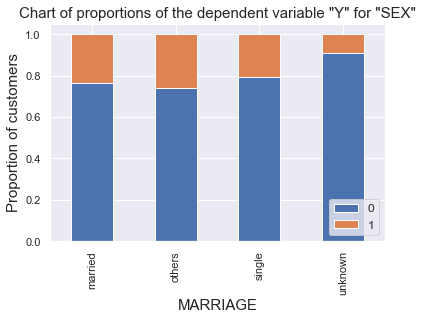

In [28]:
#Chart of proportions of the dependent variable "Y" for marriage 
marr_y=pd.crosstab(df.MARRIAGE,df.Y)
marr_y.div(marr_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6, 4))
plt.title('Chart of proportions of the dependent variable "Y" for "SEX"', fontsize=15)
plt.xlabel('MARRIAGE',fontsize=15)
plt.ylabel('Proportion of customers',fontsize=15)
plt.legend(loc='lower right', fontsize=12)
marr_y

#### Correlation testing using the Crammer's V coefficient 

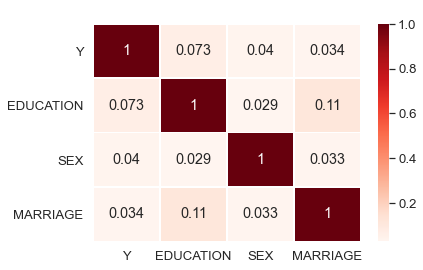

In [30]:
#Chart of dependence using the Cramer's V coefficient 
def CramersV(x):
    a = scipy.stats.chi2_contingency(x)[0]/sum(x.sum())
    b = min(x.shape[0]-1, x.shape[1]-1,)
    return(np.sqrt(a/b))

def CalculateCrammersV(x):
    ret = []
    for m in x:
        row = []
        for n in x:
            cross_tab = pd.crosstab(x[m].values,x[n].values)
            row.append(CramersV(cross_tab))
        ret.append(row)
    return pd.DataFrame(ret, columns=x.columns, index=x.columns)

categ_y = pd.DataFrame(CalculateCrammersV(df[['Y','EDUCATION', 'SEX', 'MARRIAGE']]).iloc[0,1:])
categ_y.reset_index(inplace = True)

plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.heatmap(CalculateCrammersV(df[['Y','EDUCATION', 'SEX', 'MARRIAGE']]), cmap="Reds", linewidths=.5, annot=True).set(title=' ')
plt.show()

Based on the above charts of the proportion of reliable / unreliable customers for categorizing features and correlation coefficients, it can be concluded that the relationship between the categorizing features and the variable being explained is not large. 
The largest differentiation of the proportions occurs for * `EDUCATION`* (e.g. for university and high school there is a large share of defaults in relation to the total number). 
For *`SEX`*, the share of "1" for males is slightly greater than for females. For marital status *`unknown`* there are fewer positive appearances than for others. 


<a class="anchor" id="dodatkowe"></a>
## Additional analysis 
[Back to the table of contents](#toc)

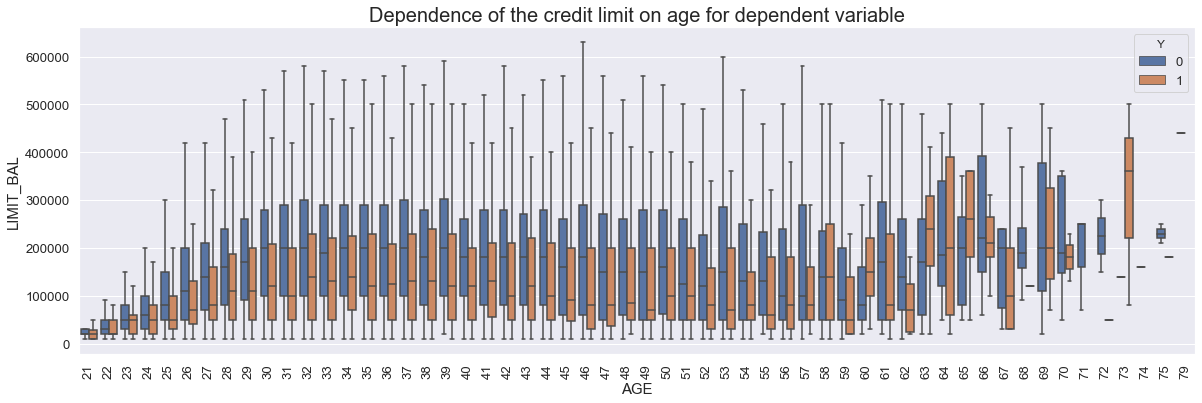

In [31]:
#Dependence of the credit limit on age for a reliable customer [0] / unreliable [1] 
chart, ax1 = plt.subplots(ncols=1, figsize=(20,6))
s = sns.boxplot(ax = ax1, x='AGE', y='LIMIT_BAL', hue='Y',
                data=df,showfliers=False)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('AGE',fontsize=15)
plt.ylabel('LIMIT_BAL',fontsize=15)
plt.title('Dependence of the credit limit on age for dependent variable', fontsize=20)
plt.show()

The chart above shows an increase in the credit limit depending on age up to around 30 years old and a stable level up to the age of 60. During this period, the average value of the credit limit for positive events is lower than for negative events. After the age of 60, most people retire and the extent of their credit limit is more hesitant and less stable. After the age of 70, there are few clients and the results are more random.

In [32]:
#average values of individual features depending on the value of the dependent variable 
df.groupby('Y').mean()

,LIMIT_BAL,AGE,PAY_DEL_SEP,PAY_DEL_AUG,PAY_DEL_JUL,PAY_DEL_JUN,PAY_DEL_MAY,PAY_DEL_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
Y,,,,,,,,,,,,,,,,,,,,
0,178084.508249,35.421041,-0.211356,-0.299979,-0.314335,-0.353760,-0.387658,-0.403814,52058.720249,49779.099121,47592.314763,43665.240026,40580.691493,39090.665395,6315.052111,6648.593829,5760.523291,5306.992843,5254.618813,5726.355817
1,129984.567119,35.723529,0.668175,0.459879,0.363348,0.255656,0.168929,0.113122,48552.813122,47326.159578,45222.238311,42074.744193,39575.724585,38305.821418,3400.118401,3391.716290,3370.398944,3158.482504,3222.052790,3444.596531


It is worth noting that the overall average of the credit limit, and thus the average of the statement and payment values in individual months, is lower for customers marked as unreliable {1} compared to reliable {0}. This may mean that unreliable customers are rather in the group of people with a lower credit limit granted. In addition, the average value of delay in repayment of liabilities for unreliable customers is positive, and for reliable customers - negative, which is quite logical - the customer failing to pay liabilities in the following months eventually becomes unreliable. 

<a class="anchor" id="przygotowanie"></a>
## Przygotowanie danych do modelowania
[Back to the table of contents](#toc)

<a class="anchor" id="odstajace"></a>
### Usunięcie odstających wartości atrybutów
Na podstawie analizy atrybutów zdecydowano o usunięciu 5% wartości odstających. Nie usuwano wartości odstających dla `zmiennej objaśnianej y`, `atrybutów kategoryzujących` oraz `atrybutów wiek`, `stan spłaty`.

In [28]:
#wybór wartości odstających
g_dolna = df.quantile(0.025)
g_gorna = df.quantile(0.975)
ilosc_odst = (df[g_gorna.index] > g_gorna).sum()
wart_odst = pd.DataFrame({'g_gorna':g_gorna, 'ilosc_odst':ilosc_odst})
print('Ilość wartości odstających: \n',wart_odst)

Ilość wartości odstających: 
                 g_gorna  ilosc_odst
limit_kredytu  500000.0         206
wiek               56.0         666
splata_wrz          2.0         463
splata_sie          2.0         483
splata_lip          2.0         389
splata_cze          2.0         348
splata_maj          2.0         341
splata_kwi          2.0         312
wyciag_wrz     262449.0         750
wyciag_sie     253568.2         750
wyciag_lip     243586.8         750
wyciag_cze     226695.0         750
wyciag_maj     211082.2         750
wyciag_kwi     205424.7         750
platnosc_wrz    32000.0         748
platnosc_sie    33000.0         749
platnosc_lip    30843.2         750
platnosc_cze    30222.5         750
platnosc_maj    30000.0         747
platnosc_kwi    35113.6         750
y                   1.0           0


In [29]:
#bez usuwania wartości odstających dla wybranych atrybutów dla których nie jest to konieczne
wart_odst.drop(['y', 'wiek', 'splata_wrz', 'splata_sie', 'splata_lip', 'splata_cze', 'splata_maj', 'splata_kwi'],
              inplace = True, axis = 0)

In [30]:
#usunięcie wartości odstajacych
for n in wart_odst.iterrows():
    df = df[df[n[0]] <= n[1]['g_gorna']]
print('Pozostała wielkość zbioru danych: \n',df.shape)

Pozostała wielkość zbioru danych: 
 (25702, 24)


<a class="anchor" id="kodowanie"></a>
### Kodowanie "gorącojedynkowe" atrybutów  kategoryzujących nominalnych


Dla każdego atrybutu, który ma wartości zawierające ciąg znaków została dodana dodatkowa kolumna z wartościami 0 lub 1.

In [31]:
df = pd.get_dummies(df)
df

,limit_kredytu,wiek,splata_wrz,splata_sie,splata_lip,splata_cze,splata_maj,splata_kwi,wyciag_wrz,wyciag_sie,...,plec_mezczyzna,wyksztalcenie_inne,wyksztalcenie_nieznane,wyksztalcenie_srednie,wyksztalcenie_wyzsze,wyksztalcenie_wyzsze_pelne,stan_cywilny_inny,stan_cywilny_kawaler_panna,stan_cywilny_nieznany,stan_cywilny_w_zwiazku
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,1,0,0,1,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,0,1,0,0,1,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,0,1,0,0,0,0,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,34,2,2,2,2,2,2,72557,77708,...,1,0,0,0,1,0,0,1,0,0
29995,220000,39,0,0,0,0,0,0,188948,192815,...,1,0,0,1,0,0,0,0,0,1
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,1,0,0,1,0,0,0,1,0,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,1,0,0,0,1,0,0,1,0,0


Z uwagi na możliwość wystąpienia współliniowości (atrybuty po podziale są skorelowane) została usunięta na stałe jedna kategoria atrybutów dla których zostały dodane więcej niż jedna kolumna dodatkowa opisująca kategorię atrybutu czyli dla *`stan_cywilny`*, *`wyksztalcenie`*, *`plec`*. Do usunięcia wybrano kategorię *`stan_cywilny_inny`*, *`wyksztalcenie_inne`* i *`plec_mezczyzna`*.

In [32]:
df.drop(axis = 1, labels = ['stan_cywilny_inny', 'wyksztalcenie_inne', 'plec_mezczyzna'], inplace = True)

<a class="anchor" id="podzial"></a>
### Podział zbioru na uczący i testowy

Dokonano podziału w stosunku: 80% – zbiór uczący, 20% – zbiór testowy.
Dodatkowo dokonano podziału zbioru uczącego na podzbiór uczący (75%) i podzbiór walidacyjny (25%) w celu dokonania sprawdzianu krzyżowego.

Przy podziale uwzględniono żeby wartości zmiennej objaśnianej były równo rozłożone pomiędzy poszczególne zbiory.

In [33]:
y = df.y.copy() #skopiowanie zmiennej objaśnianą "y" przed podziałem
df.drop('y', axis = 1, inplace = True) #usunięcie zmiennej objaśnianej ze zbioru przed podziałem

x_train, x_test, y_train, y_test = train_test_split(sm_api.add_constant(df).
                                                    rename(columns = {'const':'intercept'}), y, test_size = 0.2, 
                                                    random_state = 1, stratify = y)
x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1, 
                                                    stratify = y_train)

In [34]:
x_train.describe()
#x_test.describe()
#x_vali.describe()
#y_train.describe()
#y_test.describe()
#y_vali.describe()

,intercept,limit_kredytu,wiek,splata_wrz,splata_sie,splata_lip,splata_cze,splata_maj,splata_kwi,wyciag_wrz,...,platnosc_maj,platnosc_kwi,plec_kobieta,wyksztalcenie_nieznane,wyksztalcenie_srednie,wyksztalcenie_wyzsze,wyksztalcenie_wyzsze_pelne,stan_cywilny_kawaler_panna,stan_cywilny_nieznany,stan_cywilny_w_zwiazku
count,15420.0,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.00000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,1.0,147775.097276,35.304150,0.022503,-0.091051,-0.133722,-0.194228,-0.25000,-0.280545,40810.149157,...,2519.747341,2520.320817,0.610246,0.011349,0.172309,0.474903,0.337613,0.531453,0.001621,0.456550
std,0.0,115608.283925,9.297713,1.132885,1.222616,1.218740,1.197022,1.16623,1.185455,50620.077710,...,3798.484528,4065.167089,0.487710,0.105928,0.377661,0.499386,0.472911,0.499026,0.040234,0.498125
min,1.0,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.00000,-2.000000,-11545.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,3072.750000,...,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,120000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20079.500000,...,1200.000000,1102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,210000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,57928.000000,...,3058.000000,3011.250000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.0,500000.000000,75.000000,8.000000,8.000000,7.000000,8.000000,7.00000,8.000000,262138.000000,...,30000.000000,35012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a class="anchor" id="kategoryzacja"></a>
### Kategoryzacja atrybutów

#### Kategoryzacji atrybutów z wykorzystaniem algorytmu drzewa decyzyjnego
Wykonanie kategoryzacji atrybutów poprzez wykorzystanie algorytmu drzewa decyzyjnego do budowy nowych atrybutów kategoryzujących na podstawie atrybutów już istniejących (numerycznych) w celu zwiększenia mocy predykcyjnej atrybutów. Kategoryzacje, a co za tym idzie dobór kryterium dodania nowego atrybutu przeprowadzono dla zbioru uczącego, a następnie dopasowano odpowiednio do zbioru walidacyjnego i testowego.

In [35]:
#Funkcja wyznaczająca nowe atrybuty z wykorzystaniem algorytmu drzewa decyzyjnego
def kategoryzacja_drzewem (x_train, x_vali, x_test, y_train):
    
    #Wybór do kategoryzacji atrybutów które mają więcej niż 8 wartości unikalanych (numerycznych).    
    atrybuty_kateg = [atrybut for atrybut in x_train.columns if x_train[atrybut].unique().shape[0] > 8]

    #Dodanie nowych atrybutów    
    for atrybut in atrybuty_kateg:
        dt_model = DecisionTreeClassifier(max_depth = 3)
        dt_model.fit(x_train[atrybut].values.reshape(-1, 1), y_train)
        kategorie = dt_model.apply(x_train[atrybut].values.reshape(-1, 1))

        x_train = x_train.assign(_bin = kategorie)
        x_vali = x_vali.assign(_bin = dt_model.apply(x_vali[atrybut].values.reshape(-1, 1)))
        x_test = x_test.assign(_bin = dt_model.apply(x_test[atrybut].values.reshape(-1, 1)))

        nazwa_atrybutu = atrybut + '_bin'

        x_train.rename(columns = {'_bin' : nazwa_atrybutu}, inplace = True)
        x_vali.rename(columns = {'_bin' : nazwa_atrybutu}, inplace = True)
        x_test.rename(columns = {'_bin' : nazwa_atrybutu}, inplace = True)

    return x_train, x_vali, x_test

#Wywołanie funkcji kategoryzacja_drzewem
x_train, x_vali, x_test = kategoryzacja_drzewem(x_train, x_vali, x_test, y_train)

<a class="anchor" id="dobor_kat"></a>
### Wybór atrybutów do modelowania

Wykonano dobór i zmniejszenie ilości atrybutów w celu zmniejszenia wymiarowości (uniknięcie przetrenowania modelu) przy jednoczesnym niezmniejszeniu skuteczności modelu. Przeprowadzono dobór najlepszych atrybutów na podstawie poziomu istotności z wykorzystaniem algorytmu lasów losowych. 

#### Dobór atrybutów metodą lasów losowych

 1) splata_wrz_bin                 0.058040
 2) wiek                           0.057219
 3) splata_wrz                     0.055611
 4) wyciag_wrz                     0.048411
 5) wyciag_sie                     0.043784
 6) wyciag_lip                     0.041436
 7) wyciag_cze                     0.040579
 8) wyciag_kwi                     0.040325
 9) wyciag_maj                     0.039394
10) platnosc_wrz                   0.038177
11) platnosc_sie                   0.037059
12) platnosc_lip                   0.036055
13) platnosc_kwi                   0.035389
14) platnosc_maj                   0.034041
15) platnosc_cze                   0.033414
16) limit_kredytu_bin              0.032733
17) splata_sie                     0.023386
18) wiek_bin                       0.021382
19) splata_sie_bin                 0.020739
20) splata_lip                     0.015854
21) platnosc_kwi_bin               0.013976
22) splata_lip_bin                 0.013755
23) splata_cze_bin              

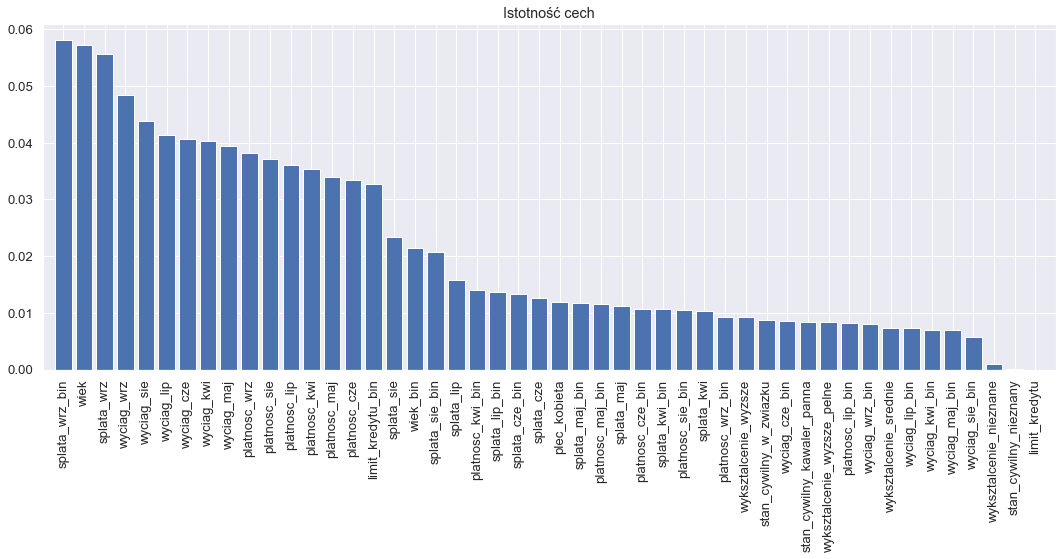

In [36]:
#Funkcja wyznaczająca poziom istotności atrybutów na podstawie algorytmu lasów losowych
def istotnosc_atrybutow_las(x_train, y_train, black_list):

    atrybuty_lasy = [atrybut for atrybut in x_train.columns if atrybut not in black_list]
    
    atrybuty = x_train.columns[1:]
    forest = RandomForestClassifier(n_estimators=500,random_state=1)
    forest.fit(x_train[atrybuty_lasy], y_train)
    istotnosc = forest.feature_importances_
    indeks = np.argsort(istotnosc)[::-1]

    for f in range(x_train[atrybuty_lasy].shape[1]):
        print("%2d) %-*s %f" % (f+1, 30,atrybuty[indeks[f]],istotnosc[indeks[f]]))


    plt.figure(figsize=(15,8))    
    plt.title('Istotność cech')
    plt.bar(range(x_train[atrybuty_lasy].shape[1]), istotnosc[indeks], align='center')
    plt.xticks(range(x_train[atrybuty_lasy].shape[1]), atrybuty[indeks], rotation=90)
    plt.xlim([-1, x_train[atrybuty_lasy].shape[1]])
    plt.tight_layout()
    plt.show()

    return istotnosc, indeks;

#do badania istotności pominięto atrybut limit_kredytu bo miał bardzo mały poziom istotności który wpływał na działanie algorytmu lasu losowego
black_list = ["limit_kredytu"]

#Wywołanie funkcji istotnosc_atrybutow_las
istotnosc, indeks = istotnosc_atrybutow_las(x_train, y_train, black_list)

Na podstawie powyższego wykresu oraz przeprowadzonych testów uzyskiwanych wyników modelowania wybrano atrybuty z poziomem istotności powyżej 0.009.

In [37]:
#Funkcja wyznaczająca najlepsze atrybuty na podstawie zadanego poziomu istotności atrybutów
def wybor_atrybutow_las(x_train, istotnosc, indeks, black_list, poziom):
    atrybuty_wybrane=[]
    atrybuty = [atrybut for atrybut in x_train.columns if atrybut not in black_list]

    for f in range(x_train[atrybuty].shape[1]):
        if istotnosc[indeks[f]] > poziom:
            atrybuty_wybrane.append(atrybuty[indeks[f]])
            
    atrybuty_wybrane.append('intercept')
    
    return atrybuty_wybrane;

atrybuty_wybrane = wybor_atrybutow_las(x_train, istotnosc, indeks, black_list, 0.009)

print('Zostały wybrane następujące atrybuty: \n',atrybuty_wybrane)


Zostały wybrane następujące atrybuty: 
 ['splata_wrz_bin', 'wiek', 'splata_wrz', 'wyciag_wrz', 'wyciag_sie', 'wyciag_lip', 'wyciag_cze', 'wyciag_kwi', 'wyciag_maj', 'platnosc_wrz', 'platnosc_sie', 'platnosc_lip', 'platnosc_kwi', 'platnosc_maj', 'platnosc_cze', 'limit_kredytu_bin', 'splata_sie', 'wiek_bin', 'splata_sie_bin', 'splata_lip', 'platnosc_kwi_bin', 'splata_lip_bin', 'splata_cze_bin', 'splata_cze', 'plec_kobieta', 'splata_maj_bin', 'platnosc_maj_bin', 'splata_maj', 'platnosc_cze_bin', 'splata_kwi_bin', 'platnosc_sie_bin', 'splata_kwi', 'platnosc_wrz_bin', 'wyksztalcenie_wyzsze', 'intercept']


In [38]:
'''
#Badanie najlepszego poziomu istotności
i=0
auc_max=0
poziom_istotnosci=0
for f in range(int((max(istotnosc))/0.001)+1):
    atrybuty_wybrane = wybor_atrybutow_las(x_train, istotnosc, indeks, black_list, i)
    
    model = Logit(y_train, x_train[atrybuty_wybrane]).fit(disp = 0) #wykonanie modelu dla danych uczących
    y_pred = model.predict(x_vali[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych
    fpr, tpr, thresholds = roc_curve(y_vali, y_pred) #wskaźniki modelu
    gini = 2 * auc(fpr, tpr) - 1    # współczynnik giniego

    print('Dla poziomu isttności', i)
    print('Pole pod krzywą ROC - AUC: %0.2f', auc(fpr, tpr))
    #print('Współczynnik Giniego: %0.2f' % gini)
    
    if auc(fpr, tpr) >= auc_max:
        auc_max = auc(fpr, tpr)
        poziom_istotnosci = i
    
    i=i+0.001;


auc_max
poziom_istotnosci

'''

"\n#Badanie najlepszego poziomu istotności\ni=0\nauc_max=0\npoziom_istotnosci=0\nfor f in range(int((max(istotnosc))/0.001)+1):\n    atrybuty_wybrane = wybor_atrybutow_las(x_train, istotnosc, indeks, black_list, i)\n    \n    model = Logit(y_train, x_train[atrybuty_wybrane]).fit(disp = 0) #wykonanie modelu dla danych uczących\n    y_pred = model.predict(x_vali[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych\n    fpr, tpr, thresholds = roc_curve(y_vali, y_pred) #wskaźniki modelu\n    gini = 2 * auc(fpr, tpr) - 1    # współczynnik giniego\n\n    print('Dla poziomu isttności', i)\n    print('Pole pod krzywą ROC - AUC: %0.2f', auc(fpr, tpr))\n    #print('Współczynnik Giniego: %0.2f' % gini)\n    \n    if auc(fpr, tpr) >= auc_max:\n        auc_max = auc(fpr, tpr)\n        poziom_istotnosci = i\n    \n    i=i+0.001;\n\n\nauc_max\npoziom_istotnosci\n\n"

<a class="anchor" id="model"></a>
## Model Regresja logistyczna
[Back to the table of contents](#toc)

<a class="anchor" id="budowa"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm regresji logistycznej z biblioteki *statsmodels*.


In [39]:
model = Logit(y_train, x_train[atrybuty_wybrane]).fit(disp = 0) #wykonanie modelu dla danych uczących
y_pred = model.predict(x_vali[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena"></a>
### Ocena modelu dla zbioru walidacyjnego

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                15420
Model:                          Logit   Df Residuals:                    15385
Method:                           MLE   Df Model:                           34
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.1753
Time:                        13:33:53   Log-Likelihood:                -6934.8
converged:                       True   LL-Null:                       -8409.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
splata_wrz_bin           0.7019      0.035     20.334      0.000       0.634       0.770
wiek                     0.0036      0.004      0.922      0.357      -0.004       0.011
splata_wrz              -0.4561      0.052     -8.760      0.000      -0.558      -0.354
wyciag_wrz           -8.194e-06   2.18e-06     -3.750      0.000   -1.25e-05   -3.91e-06
wyciag_sie            5.127e-06   3.05e-06      1.678      0.093    -8.6e-07    1.11e-05
wyciag_lip            5.012e-06   2.79e-06      1.794      0.073   -4.64e-07    1.05e-05
wyciag_cze            1.787e-07   2.81e-06      0.064      0.949   -5.33e-06    5.69e-06
wyciag_kwi            7.556e-06   3.09e-06      2.446      0.014     1.5e-06    1.36e-05
wyciag_maj           -5.119e-06   3.76e-06     -1.362      0.173   -1.25e-05    2.25e-06
platnosc_wrz          3.938e-06   8.58e-06      0.459      0.646   -1.29e-05    2.08e-05
platnosc_sie         -5.036e-06   8.92e-06     -0.565      0.572   -2.25e-05    1.24e-05
platnosc_lip         -1.365e-05   8.24e-06     -1.656      0.098   -2.98e-05    2.51e-06
platnosc_kwi          3.096e-07   9.55e-06      0.032      0.974   -1.84e-05     1.9e-05
platnosc_maj          -2.61e-05   1.22e-05     -2.148      0.032   -4.99e-05   -2.28e-06
platnosc_cze          2.128e-05   9.52e-06      2.235      0.025    2.62e-06    3.99e-05
limit_kredytu_bin       -0.0300      0.008     -3.748      0.000      -0.046      -0.014
splata_sie              -0.5520      0.102     -5.428      0.000      -0.751      -0.353
wiek_bin                 0.0122      0.016      0.777      0.437      -0.019       0.043
splata_sie_bin           0.4041      0.072      5.648      0.000       0.264       0.544
splata_lip              -0.1829      0.174     -1.052      0.293      -0.524       0.158
platnosc_kwi_bin        -0.0261      0.011     -2.299      0.021      -0.048      -0.004
splata_lip_bin           0.1821      0.121      1.504      0.133      -0.055       0.419
splata_cze_bin           0.2081      0.140      1.483      0.138      -0.067       0.483
splata_cze              -0.1675      0.202     -0.830      0.406      -0.563       0.228
plec_kobieta            -0.1268      0.044     -2.877      0.004      -0.213      -0.040
splata_maj_bin           0.2798      0.131      2.132      0.033       0.023       0.537
platnosc_maj_bin        -0.0147      0.015     -0.959      0.337      -0.045       0.015
splata_maj              -0.3818      0.192     -1.984      0.047      -0.759      -0.005
platnosc_cze_bin        -0.0976      0.018     -5.408      0.000      -0.133      -0.062
splata_kwi_bin          -0.1794      0.093     -1.935      0.053      -0.361       0.002
platnosc_sie_bin        -0.0511      0.010     -5.219      0.000      -0.070      -0.032
splata_kwi               0.2984      0.113      2.633      0.008       0.076       0.521
platnosc_wrz_bin        -0.0792      0.010     -8.256      0.000      -0.098      -0.060
wyksztalcenie_wyzsze     0.0462      

Podany powyżej współczynnik `coef` wskazuje logarytmy szans zajścia niespłacenia kredytu dla poszczególnych atrybutów. Im większe wartości tym większa szansa niespałcenia kredytu. Najwyższy wpływ na niespłacenie kredytu mają atrybuty związane ze stanem spłaty kredytu we wcześniejszych miesiącach, a szczególnie w miesiącu poprzedzającym badany miesiąc (co jest w miarę oczywiste).


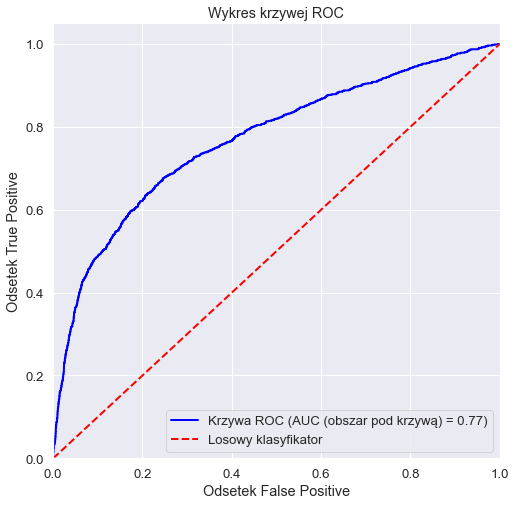

Pole pod krzywą ROC - AUC: 0.77
Współczynnik Giniego: 0.54


In [41]:
#Funkcja wyliczająca wskaźniki oceny modelu
def ocena_modelu(y_vali, y_pred):
    fpr, tpr, thresholds = roc_curve(y_vali, y_pred) #wskaźniki modelu
    gini = 2 * auc(fpr, tpr) - 1    # współczynnik giniego
  
    plt.figure(figsize=(8,8))
    lw=2
    plt.plot(fpr, tpr, color='blue',lw=lw, label='Krzywa ROC (AUC (obszar pod krzywą) = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Losowy klasyfikator')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Odsetek False Positive')
    plt.ylabel('Odsetek True Positive')
    plt.title('Wykres krzywej ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    print('Pole pod krzywą ROC - AUC: %0.2f' % auc(fpr, tpr))
    print('Współczynnik Giniego: %0.2f' % gini);


#Wywołanie funkcji do oceny modelu  
ocena_modelu(y_vali, y_pred)


Wykres Krzywej ROC jest najbardziej oddalony od lini losowego klasyfikatora w początkowym fragmencie i osiąga maksimum około pierwszej ćwiartki wykresu. Wskazuje to, że szukany optymalny punkt odcięcia (wyznaczony w kolejnym etapie) będzie znajdował się w tym obszarze.<br>
Wartość AUC oraz współczynnika Giniego są akceptowalne, choć ich wartości nie są bardzo duże.

<a class="anchor" id="model_fin"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin"></a>
### Model finalny

In [42]:
model_fin = Logit(y_train, x_train[atrybuty_wybrane]).fit(disp = 0)
y_pred_fin = model_fin.predict(x_test[atrybuty_wybrane])

<a class="anchor" id="ocena_fin"></a>
### Ocena modelu dla zbioru testowego

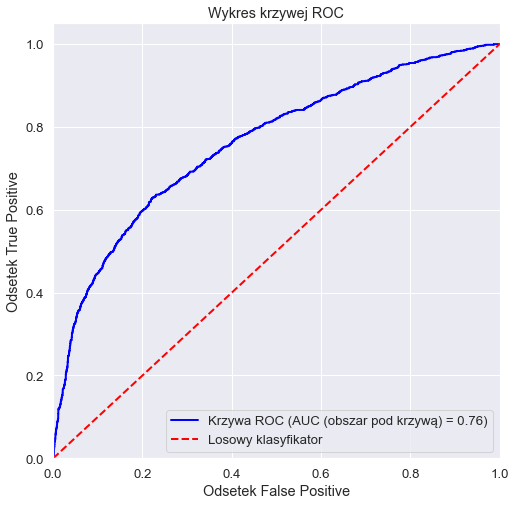

Pole pod krzywą ROC - AUC: 0.76
Współczynnik Giniego: 0.52


In [43]:
ocena_modelu(y_test, y_pred_fin)

Jak widać finalny model klasyfikatora ma prawie identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego i moża je uznać za zadawalające. Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany i powinien uzyskiwać podobne wyniki na rzeczywistych danych.

<a class="anchor" id="punkt"></a>
### Wyznaczanie optymalnego punktu odcięcia

W celu ostatecznej weryfikacji jakości modelu zostały wzięte pod uwagę uwarunkowania biznesowe procesu przyznawania kredytu. Na podstawie otrzymanych wyników modelowania przy zastosowaniu zbioru danych testowych został wyznaczony punkt odcięcia. Założono, że najoptymalniejszy punktu odcięcia będzie odpowiadał maksymalnemu dochodowi banku osiągniętemu dla wyznaczonych ilości klientów którym przyznano kredyt. Zgodnie z założeniami podanymi na początku dochód banku został określony jako:

*dochód = wiarygodni klienci którym przyznano kredyt * zysk - niewiarygodni klienci którym przyznano kredyt * strata*

In [44]:
def punkt_odciecia(y_test, y_pred_fin, zysk,strata):
    punkty_odciecia = np.arange(0, 1.01, 0.01) #punkty odcięcia od 0 do 1 z krokiem co 0.01

    #wyznaczenie dochodów dla poszczególnych punktów odcięcia
    dochody = {}
    for punkt_odciecia in punkty_odciecia:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fin>punkt_odciecia).ravel()
        dochod = tn * zysk + fn * -strata
        dochody[punkt_odciecia] = dochod
    dochody = pd.Series(dochody)

    #wyznaczenie maks. dochodu
    max_dochod = dochody.iloc[dochody.argmax()]
    punkt_odciecia_fin = dochody.iloc[dochody.argmax():dochody.argmax()+1].index[0]
    
    return  punkt_odciecia_fin, max_dochod, dochody;

#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_fin, 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 23475, któremu odpowiada punkt odcięcia: 0.23.


<a class="anchor" id="ocena_punkt"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

#### Macierz pomyłek i wskaźniki klasyfikacji

|  | Prognozowane "0"  | Prognozowane "1"  
------------ | ------------- | -------------
Prawdziwe "0" | TN | FP
Prawdziwe "1" | FN | TP

Zgodnie z założeniami przy podjęciu określonej decyzji mogą wystąpić następujące sytuacje:
*    True Negative: przyznanie karty kredytowej i spłacanie zadłużenia
*    False Negative: przyznanie karty kredytowej i niespłacanie zadłużenia
*    True Positive: nieprzyznanie karty kredytowej i niespłacanie zadłużenia
*    False Positive: nieprzyznanie karty kredytowej i spłacanie zadłużenia


In [45]:
def wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_fin>punkt_odciecia_fin).ravel()
    dokladnosc = (tn+tp) / (tn+tp+fn+fp)
    blad = (fn+fp) / (tn+tp+fn+fp)
    specyficznosc = tn / (tn+fp)
    czulosc = tp / (tp + fn)

    macierz_pomylek = pd.DataFrame(confusion_matrix(y_test, y_pred_fin>punkt_odciecia_fin),
                                   columns = ['Prognozowane "0"', 'Prognozowane "1"'],
                                   index = ['Prawdziwe "0"', 'Prawdziwe "1"'])
    print(classification_report(y_test, y_pred_fin>punkt_odciecia_fin))
    print('Dokładność: {}'.format(dokladnosc.round(2)))
    print('Błąd: {}'.format(blad.round(2)))
    print('Specyficzność: {}'.format(specyficznosc.round(2)))
    print('Czułość: {}'.format(czulosc.round(2)))
    print(macierz_pomylek) 
    return tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      3933
           1       0.46      0.63      0.53      1208

    accuracy                           0.74      5141
   macro avg       0.67      0.70      0.68      5141
weighted avg       0.78      0.74      0.75      5141

Dokładność: 0.74
Błąd: 0.26
Specyficzność: 0.78
Czułość: 0.63
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3055               878
Prawdziwe "1"               447               761


<a class="anchor" id="rentownosc"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [46]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('- Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('- Wartość uzyskanego dochodu: ', max_dochod)

print('- Ilość badanych klientów:', tn + fn + fp + tp)
print('- Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('- Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

- Rentowność: 6.7%
- Wartość uzyskanego dochodu:  23475
- Ilość badanych klientów: 5141
- Ilość klientów sklasyfikowanych jako wiarygodnych: 3502
- Ilość klientów sklasyfikowanych jako niewiarygodnych: 1639
- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 3055
- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 447
- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 878
- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 761


Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że jakość modelu biorąc pod uwagę uzyskany dochód z całego portfela kredytów jest satysfakcjonujący. 
Model całkiem dobrze klasyfikuje klientów niewiarygodnych. Wyznaczona dokładność jest dobra, choć dla sytuacji najgorszej (klientów niewiarygodnych, a sklasyfikowanych jako wiarygodnych) ilość klientów wynosi 447. Czułość, która wskazuje udział klientów
sklasyfikowanych poprawnie jako niewiarygodnych w ogólnej liczbie klientów niewiarygodnych jest poprawna. Specyficzność jest wysoka, ale nominalnie model klasyfikuje dużo klientów wiarygodnych jako niewiarygodnych (FP=878), co oznacza niewykorzystanie potencjalnego zysku z wiarygodnych klientów (zgodnie z założeniami nie wzięto tego pod uwagę do oceny rentowności modelu). 

Prawdopodobnie należałoby jeszcze poprawić dobór parametrów lub zastosować transformacje atrybutów, ale mogłoby to też mieć wpływ na interpretowalność modelu. 

<a class="anchor" id="inne_doch"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu na podstawie regresji logistycznej

In [47]:
punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl = punkt_odciecia_fin, max_dochod, dochody

In [48]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_rl_15_75, max_dochod_rl_15_75, dochody_rl_15_75 = punkt_odciecia(y_test, y_pred_fin, 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_rl_15_75, punkt_odciecia_fin_rl_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_rl_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 13950, któremu odpowiada punkt odcięcia: 0.17.

              precision    recall  f1-score   support

           0       0.89      0.60      0.71      3933
           1       0.37      0.77      0.50      1208

    accuracy                           0.64      5141
   macro avg       0.63      0.68      0.61      5141
weighted avg       0.77      0.64      0.66      5141

Dokładność: 0.64
Błąd: 0.36
Specyficzność: 0.6
Czułość: 0.77
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2345              1588
Prawdziwe "1"               283               925

 Rentowność: 5.31%


In [49]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_rl_10_75, max_dochod_rl_10_75, dochody_rl_10_75 = punkt_odciecia(y_test, y_pred_fin, 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_rl_10_75, punkt_odciecia_fin_rl_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_rl_10_75)

#Założone wartości zysku i straty
zysk = 10
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 4075, któremu odpowiada punkt odcięcia: 0.1.

              precision    recall  f1-score   support

           0       0.94      0.22      0.35      3933
           1       0.27      0.95      0.42      1208

    accuracy                           0.39      5141
   macro avg       0.60      0.58      0.39      5141
weighted avg       0.78      0.39      0.37      5141

Dokładność: 0.39
Błąd: 0.61
Specyficzność: 0.22
Czułość: 0.95
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"               850              3083
Prawdziwe "1"                59              1149

 Rentowność: 4.48%


<a class="anchor" id="model_xgb"></a>
## Model XGBoost
[Back to the table of contents](#toc)

<a class="anchor" id="hiperparametry_xgb"></a>
### Optymalizacja hiperparametrów modelu
Przed przystąpieniem do budowy modelu został przeprowadzony dobór hiperparamterów dla algorytmu XGBoost z zastosowaniem metody losowego doboru przy pomocy funkcji RandomizedSearchCV.

In [50]:
#określenie zakresów możliwych wartości hiperparametrów
parametry_xgb = {
                'n_estimators' : randint(50, 500),
                'max_depth' : randint(2, 10),
                'learning_rate' : uniform(loc = 0, scale = 1),
                'gamma' : uniform(loc = 0, scale = 1),
                'min_child_weight' : randint(1, 5),
                'subsample': uniform(loc = 0, scale = 1),
                'colsample_bytree': uniform(loc = 0, scale = 1),
                'reg_alpha' : uniform(loc = 0, scale = 1),
                'reg_lambda' : uniform(loc = 0, scale = 1),    
                'booster' : ['gbtree', 'gblinear', 'dart'],
                'n_jobs' : [2]
                }

In [51]:
#po jednym wyznaczeniu najlepszych parametrów zaznaczenie poniższego kodu żeby się nie wykonywał bo trwa to długo
"""
def losowa_optymalizacja_hp(x, y, hiperparametry, model, n_iter=20, n_jobs = 2, cv = 5):

    rs = RandomizedSearchCV(model, hiperparametry, n_iter = n_iter, n_jobs = n_jobs, cv = cv)
    rs.fit(x, y.values.ravel())
    wybrane_parametry = rs.best_params_
    return wybrane_parametry;
    

wybrane_parametry_xgb = losowa_optymalizacja_hp(x_train, y_train, parametry_xgb, XGBClassifier(), n_iter=20, n_jobs = 2, cv = 5)
"""

'\ndef losowa_optymalizacja_hp(x, y, hiperparametry, model, n_iter=20, n_jobs = 2, cv = 5):\n\n    rs = RandomizedSearchCV(model, hiperparametry, n_iter = n_iter, n_jobs = n_jobs, cv = cv)\n    rs.fit(x, y.values.ravel())\n    wybrane_parametry = rs.best_params_\n    return wybrane_parametry;\n    \n\nwybrane_parametry_xgb = losowa_optymalizacja_hp(x_train, y_train, parametry_xgb, XGBClassifier(), n_iter=20, n_jobs = 2, cv = 5)\n'

In [52]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#1 zestaw

wybrane_parametry_xgb1 = {
                         'booster': 'gbtree',
                         'colsample_bytree': 0.8753771345781897,
                         'gamma': 0.48883529942357284,
                         'learning_rate': 0.2058684382998024,
                         'max_depth': 2,
                         'min_child_weight': 1,
                         'n_estimators': 83,
                         'n_jobs': 2,
                         'reg_alpha': 0.45215106729387755,
                         'reg_lambda': 0.34681411765531367,
                         'subsample': 0.21734404631007365
                         }


In [53]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#2 zestaw

wybrane_parametry_xgb2 = {
                         'booster': 'dart',
                         'colsample_bytree': 0.9605376499649342,
                         'gamma': 0.4384656850867038,
                         'learning_rate': 0.025148695022606304,
                         'max_depth': 2,
                         'min_child_weight': 3,
                         'n_estimators': 348,
                         'n_jobs': 2,
                         'reg_alpha': 0.9064044727851012,
                         'reg_lambda': 0.52273189331008,
                         'subsample': 0.4914632579512438
                         }


In [54]:
#wybór odpowiedniego zestawu hiperparametrów dla modelu

wybrane_parametry_xgb=wybrane_parametry_xgb2

<a class="anchor" id="budowa_xgb"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm *XGBClassifier* z biblioteki *xgboost*.


In [55]:
model_xgb = XGBClassifier(**wybrane_parametry_xgb) #wykonanie modelu dla danych uczących
model_xgb.fit(x_train[atrybuty_wybrane], y_train.values.ravel())
y_pred_xgb = model_xgb.predict_proba(x_vali[atrybuty_wybrane])#sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena_xgb"></a>
### Ocena modelu dla zbioru walidacyjnego

In [56]:
#ocena istotności atrybutów
pd.DataFrame(model_xgb.feature_importances_, index = x_train[atrybuty_wybrane].columns)\
                                                        .sort_values(by = 0, ascending = False)

,0
splata_wrz_bin,0.196982
splata_wrz,0.126508
splata_sie_bin,0.060953
splata_lip,0.051398
splata_sie,0.047753
splata_cze_bin,0.047536
splata_kwi,0.039380
splata_maj_bin,0.036395
splata_kwi_bin,0.029926
platnosc_wrz_bin,0.025933


Na podstawie funkcji feature_importances_ określono, że najwyższy wpływ na niespłacenie kredytu mają atrybuty związane ze stanem spłaty kredytu we wcześniejszych miesiącach.


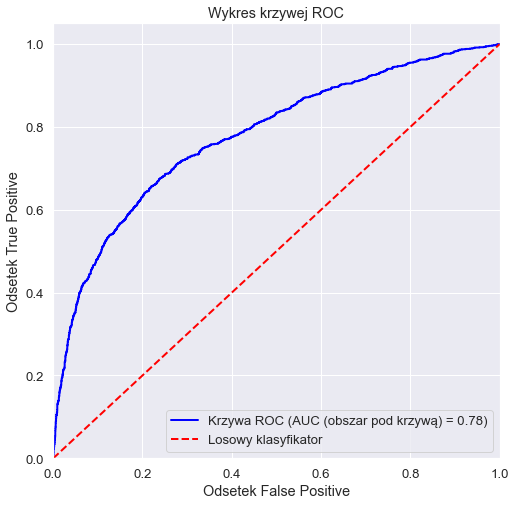

Pole pod krzywą ROC - AUC: 0.78
Współczynnik Giniego: 0.56


In [57]:
#Wywołanie funkcji do oceny modelu XGBoost
ocena_modelu(y_vali, y_pred_xgb[:, 1])


Wykres krzywej ROC dla zbudowanego modelu jest znacznie oddalony od linii losowego klasyfikatora i praktycznie identyczny jak dla modelu
z regresją logistyczną.<br>
Wyznaczona wartość pola pod krzywą ROC - AUC oraz współczynnik Giniego są trochę lepsze niż dla modelu podstawowego

<a class="anchor" id="model_fin_xgb"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin_xgb"></a>
### Model finalny

In [58]:
model_xgb_fin = XGBClassifier(**wybrane_parametry_xgb) #wykonanie modelu dla danych uczących
model_xgb_fin.fit(x_train[atrybuty_wybrane], y_train.values.ravel())
y_pred_xgb_fin = model_xgb.predict_proba(x_test[atrybuty_wybrane])#wykonanie predykcji dla danych walidacyjnych

<a class="anchor" id="ocena_fin_xgb"></a>
### Ocena modelu dla zbioru testowego

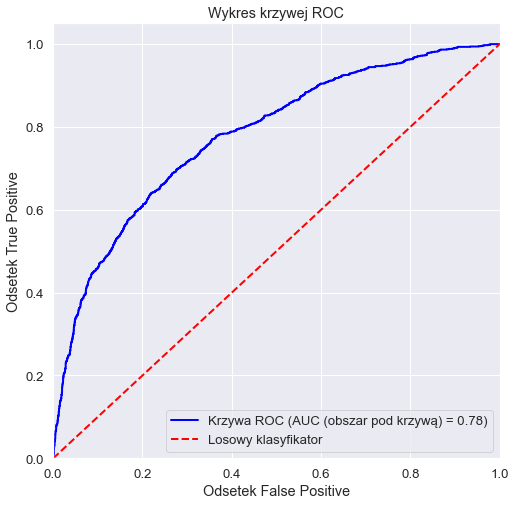

Pole pod krzywą ROC - AUC: 0.78
Współczynnik Giniego: 0.56


In [59]:
#Wywołanie funkcji do oceny modelu XGB
ocena_modelu(y_test, y_pred_xgb_fin[:, 1])

Finalny model klasyfikatora dla zbioru testowego identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego  Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany.


<a class="anchor" id="punkt_xgb"></a>
### Wyznaczanie optymalnego punktu odcięcia

In [60]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_xgb_fin[:, 1], 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 24305, któremu odpowiada punkt odcięcia: 0.2.


<a class="anchor" id="ocena_punkt_xgb"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

### Macierz pomyłek i wskaźniki klasyfikacji

|  | Prognozowane "0"  | Prognozowane "1"  
------------ | ------------- | -------------
Prawdziwe "0" | TN | FP
Prawdziwe "1" | FN | TP

In [61]:
#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = \
            wskazniki_modelu(y_test, y_pred_xgb_fin[:, 1], punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      3933
           1       0.44      0.69      0.54      1208

    accuracy                           0.72      5141
   macro avg       0.66      0.71      0.67      5141
weighted avg       0.78      0.72      0.74      5141

Dokładność: 0.72
Błąd: 0.28
Specyficzność: 0.73
Czułość: 0.69
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2867              1066
Prawdziwe "1"               374               834


<a class="anchor" id="rentownosc_xgb"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [62]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('Wartość uzyskanego dochodu:', max_dochod)
print('Ilość badanych klientów:', tn + fn + fp + tp)
print('Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

Rentowność: 7.5%
Wartość uzyskanego dochodu: 24305
Ilość badanych klientów: 5141
Ilość klientów sklasyfikowanych jako wiarygodnych: 3241
Ilość klientów sklasyfikowanych jako niewiarygodnych: 1900
Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 2867
Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 374
Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 1066
Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 834


Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że wyniki są praktycznie identyczne jak dla modelu z regresją logistyczną. Uzyskana rentowność i łączny dochód są nieznacznie lepsze dla modelu XBGBoost. Model na podstawie algorytmu XGBoost bardzo podobnie do modelu podstawowego klasyfikuje klientów, choć uzyskuje nieznacznie więcej klientów niewiarygodnych. Wyznaczone dokładność, specyficzność i czułość są praktycznie identyczne. 
 

<a class="anchor" id="inne_doch_xgb"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu na podstawie XGBoost

In [63]:
punkt_odciecia_fin_xgb, max_dochod_xgb, dochody_xgb = punkt_odciecia_fin, max_dochod, dochody

In [64]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_xgb_15_75, max_dochod_xgb_15_75, dochody_xgb_15_75 = punkt_odciecia(y_test, y_pred_xgb_fin[:, 1], 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_xgb_15_75, punkt_odciecia_fin_xgb_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_xgb_fin[:, 1], punkt_odciecia_fin_xgb_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 17130, któremu odpowiada punkt odcięcia: 0.17.

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      3933
           1       0.40      0.77      0.53      1208

    accuracy                           0.67      5141
   macro avg       0.65      0.71      0.64      5141
weighted avg       0.78      0.67      0.70      5141

Dokładność: 0.67
Błąd: 0.33
Specyficzność: 0.64
Czułość: 0.77
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2532              1401
Prawdziwe "1"               278               930

 Rentowność: 6.1%


In [65]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_xgb_10_75, max_dochod_xgb_10_75, dochody_xgb_10_75 = punkt_odciecia(y_test, y_pred_xgb_fin[:, 1], 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_xgb_10_75, punkt_odciecia_fin_xgb_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_xgb_fin[:, 1], punkt_odciecia_fin_xgb_10_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 6820, któremu odpowiada punkt odcięcia: 0.12.

              precision    recall  f1-score   support

           0       0.93      0.39      0.55      3933
           1       0.31      0.91      0.47      1208

    accuracy                           0.51      5141
   macro avg       0.62      0.65      0.51      5141
weighted avg       0.79      0.51      0.53      5141

Dokładność: 0.51
Błąd: 0.49
Specyficzność: 0.39
Czułość: 0.91
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              1537              2396
Prawdziwe "1"               114              1094

 Rentowność: 8.79%


<a class="anchor" id="porownanie_doch"></a>
## Porównanie dochodów osiąganych przez modele na podstawie regresji logistycznej i XGBoost
[Back to the table of contents](#toc)

W celu porównania osiąganych wyników przez zbudowane modele zostały wykonane krzywe dochodów w zależności od punktów odcięcia.
Dodatkowo zostały dodane krzywe dochodów przy zmienionych wartościach zysku i straty. 

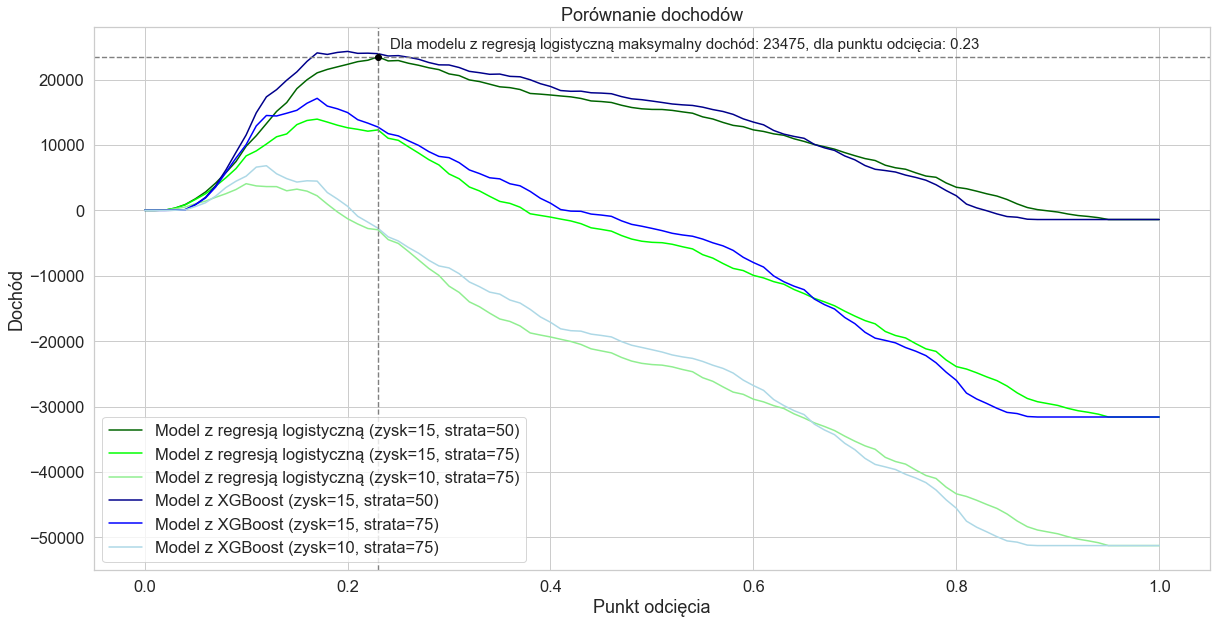

In [66]:
def porownianie_dochodu(punkt_odciecia_fin, max_dochod, dochody_1_15_50, dochody_1_15_75, dochody_1_10_75, 
                        dochody_2_15_50, dochody_2_15_75, dochody_2_10_75, tekst1, tekst2):
    
    punkty_odciecia = np.arange(0, 1.01, 0.01)
    sns.set(font_scale=1.5, style="whitegrid")

    plt.figure(figsize = (20, 10))
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_1_15_50, color = 'darkgreen',label='Model z '+tekst1+' (zysk=15, strata=50)')
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_1_15_75, color = 'lime',label='Model z '+tekst1+' (zysk=15, strata=75)')
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_1_10_75, color = 'lightgreen',label='Model z '+tekst1+' (zysk=10, strata=75)')
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_2_15_50, color = 'darkblue',label='Model z '+tekst2+' (zysk=15, strata=50)')
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_2_15_75, color = 'blue',label='Model z '+tekst2+' (zysk=15, strata=75)')
    ax_1 = sns.lineplot(x = punkty_odciecia, y = dochody_2_10_75, color = 'lightblue',label='Model z '+tekst2+' (zysk=10, strata=75)')

    #Narysowanie lini punktu odcięcia i maks. dochodu
    ax_1.axvline(punkt_odciecia_fin, linestyle = '--', color = 'grey', linewidth = 1.4)
    ax_1.axhline(max_dochod, linestyle = '--', color = 'grey', linewidth = 1.4)

    txt=('Dla modelu z '+tekst1+' maksymalny dochód: {}, dla punktu odcięcia: {}'.format(max_dochod,punkt_odciecia_fin))
    plt.text(punkt_odciecia_fin*1.05, max_dochod*1.08, txt, horizontalalignment='left', 
             verticalalignment='center', fontsize=15);
    ax_1.plot(punkt_odciecia_fin, max_dochod, "or", color = 'black')


    ax_1.set_xlabel('Punkt odcięcia')
    ax_1.set_ylabel('Dochód')
    plt.title('Porównanie dochodów')
    plt.show();

porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_xgb, dochody_xgb_15_75, dochody_xgb_10_75, 
                    tekst1='regresją logistyczną', tekst2='XGBoost')
            

Na podstawie powyższych wykresów można stwierdzić, że uzyskiwane dochody są bardzo podobne dla obu zbudowanych modeli. Dodatkowo na podstawie wykresu oraz przeprowadzonych testów należy dodać, że na rzeczywisty wynik bardzo duży wpływ będą miały realne wartości zysku i straty. Dla przykładu w modelu z regresją logistyczną założono, że bankowi nie udałoby się odzyskać połowy wartości kredytu (źle przeprowadzony proces windykacji) i strata wyniosłaby 75%. Spowodowałoby to zmniejszenie wartości rentowność z 6.7% do 5.31% oraz dochodu maksymalnego z 23475 do 13950.
Dodatkowo dla zmiany zysku z 15% na 10% co prawda rentowność wyniosłaby 4.48%, ale dochód równy 4075 byłby na tyle mały, że cała działalność mogłaby być nieopłacalna. 

<a class="anchor" id="podsumowanie"></a>
## Podsumowanie i wnioski
[Back to the table of contents](#toc)

Podsumowując udało się zbudować model, który pozwala na wyznaczenie
niewypłacalności klientów w przyszłym miesiącu z uwzględnieniem założeń biznesowych tj. maksymalizowania uzyskanego dochodu przez bank z całego portfela kredytowego.
Zbudowany model na bazie algorytmu regresji logistycznej daje dobre rezultaty zarówno jeśli chodzi o parametry jakości modelu jak również rentowność procesu przyznawania kredytów, biorąc pod uwagę cały portfel kredytowy. Uzyskana rentowność (średni dochód na łączną ilość udzielonych kredytów) jest dobra i wynosi 6.7%. Łączny dochód wyniósł 23475 (gdzie 100 oznacza uśrednioną wartość przyznanego kredytu).<br>
Wykonany do porównania osiąganych wyników model oparty o algorytm XGBoost uzyskiwał bardzo podobne wyniki jak model podstawowy. Biorąc pod uwagę ograniczenie związane z wykorzystaniem algorytmów w pełni interpretowalnych w procesie przyznawania kredytów możliwe jest zatem stosowanie algorytmu regresji logistycznej bez znaczącego spadku skuteczności modelu. Dla jakości modelu bardziej istotne niż wybór rodzaju algorytmu okazało się przygotowanie danych oraz wybór właściwych atrybutów.

W celu dokładnej oceny jakości modelu przed zastosowaniem w rzeczywistych warunkach należałoby jeszcze wykonać sprawdzenie modelu dodatkowym zestawem danych, który powinien zawierać obserwacje z innego okresu niż obserwacje widoczne w badanym zbiorze danych. Dodatkowo dla poprawy wyników można by zastosować jeszcze inny typ 
algorytmu do zbudowania modelu np. algorytm drzewa decyzyjnego i przeprowadzić weryfikacje osiągniętych wyników. Prawdopodobnie zastosowanie dodatkowych transformacji wartości atrybutów lub poprawienie doboru parametrów miałoby korzystny wpływ na poprawienie skuteczności modelu, ale mogłoby też mieć wpływ na interpretowalność modelu.
 

<a class="anchor" id="modele_dodatkowe"></a>
# Dodatkowe modele
[Back to the table of contents](#toc)

<a class="anchor" id="model_tree"></a>
## Model Drzewo decyzyjne
[Back to the table of contents](#toc)

<a class="anchor" id="hiperparametry_tree"></a>
### Optymalizacja hiperparametrów modelu
Przed przystąpieniem do budowy modelu został przeprowadzony dobór hiperparamterów z zastosowaniem metody losowego doboru przy pomocy funkcji RandomizedSearchCV.

In [67]:
#określenie zakresów możliwych wartości hiperparametrów
parametry_tree = {
                    'criterion':('entropy', 'gini'),
                    'splitter':('best','random'),
                    'max_depth':randint(1,6),
                    'min_samples_split':randint(3,8),
                    'min_samples_leaf':randint(1,5)
                 };

In [68]:
#po jednym wyznaczeniu najlepszych parametrów zaznaczenie poniższego kodu żeby się nie wykonywał bo trwa to długo
''' 
wybrane_parametry_tree = losowa_optymalizacja_hp(x_train, y_train, parametry_tree, DecisionTreeClassifier(), n_iter=20, n_jobs = 2, cv = 10)
wybrane_parametry_tree
'''

' \nwybrane_parametry_tree = losowa_optymalizacja_hp(x_train, y_train, parametry_tree, DecisionTreeClassifier(), n_iter=20, n_jobs = 2, cv = 10)\nwybrane_parametry_tree\n'

In [69]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#1 zestaw

wybrane_parametry_tree1 = {
                           'criterion': 'gini',
                           'max_depth': 4,
                           'min_samples_leaf': 4,
                           'min_samples_split': 6,
                           'splitter': 'random'
                          };


In [70]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#2 zestaw

wybrane_parametry_tree2 = {
                           'criterion': 'gini',
                           'max_depth': 4,
                           'min_samples_leaf': 4,
                           'min_samples_split': 4,
                           'splitter': 'best'
                          };


In [71]:
#wybór odpowiedniego zestawu hiperparametrów dla modelu

wybrane_parametry_tree=wybrane_parametry_tree1

<a class="anchor" id="budowa"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm drzewa decyzyjnego z biblioteki *sklearn.tree*.


In [72]:
model = DecisionTreeClassifier(**wybrane_parametry_tree)
#wykonanie modelu dla danych uczących, przy użyciu walidacji krzyżowej w celu uniknięcia przetrenowania modelu
cv = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy') 

print('Średnie dokładność: ' + str(cv.mean().round(3)))
print('Stabilność: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Średnie dokładność: 0.811
Stabilność: 0.778%


In [73]:
model.fit(x_train[atrybuty_wybrane], y_train)
y_pred = model.predict(x_vali[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena"></a>
### Ocena modelu dla zbioru walidacyjnego

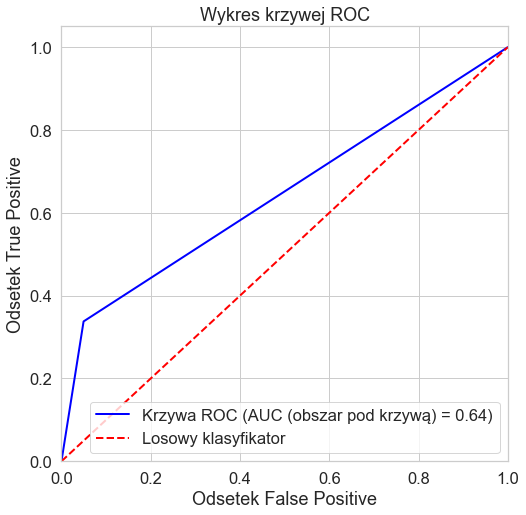

Pole pod krzywą ROC - AUC: 0.64
Współczynnik Giniego: 0.29


In [74]:
#Wywołanie funkcji do oceny modelu  
ocena_modelu(y_vali, y_pred)


Wykres Krzywej ROC jest najbardziej oddalony od lini losowego klasyfikatora w początkowym fragmencie i osiąga maksimum około pierwszej ćwiartki wykresu. Wskazuje to, że szukany optymalny punkt odcięcia (wyznaczony w kolejnym etapie) będzie znajdował się w tym obszarze.<br>
Wartość AUC oraz współczynnika Giniego są akceptowalne, choć ich wartości nie są bardzo duże.

<a class="anchor" id="model_fin"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin"></a>
### Model finalny

In [75]:
y_pred_fin = model.predict(x_test[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena_fin"></a>
### Ocena modelu dla zbioru testowego

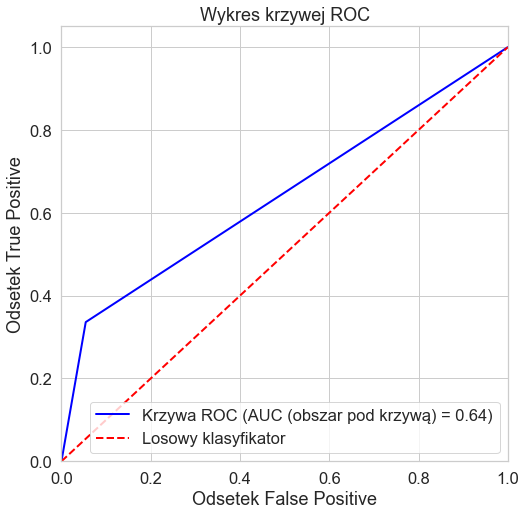

Pole pod krzywą ROC - AUC: 0.64
Współczynnik Giniego: 0.28


In [76]:
ocena_modelu(y_test, y_pred_fin)

Jak widać finalny model klasyfikatora ma prawie identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego i moża je uznać za zadawalające. Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany i powinien uzyskiwać podobne wyniki na rzeczywistych danych.

<a class="anchor" id="punkt"></a>
### Wyznaczanie optymalnego punktu odcięcia

In [77]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_fin, 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 15685, któremu odpowiada punkt odcięcia: 0.0.


<a class="anchor" id="ocena_punkt"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

In [78]:
#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.65      0.34      0.44      1208

    accuracy                           0.80      5141
   macro avg       0.74      0.64      0.66      5141
weighted avg       0.78      0.80      0.78      5141

Dokładność: 0.8
Błąd: 0.2
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3719               214
Prawdziwe "1"               802               406


<a class="anchor" id="rentownosc"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [79]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('- Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('- Wartość uzyskanego dochodu: ', max_dochod)

print('- Ilość badanych klientów:', tn + fn + fp + tp)
print('- Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('- Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

- Rentowność: 3.47%
- Wartość uzyskanego dochodu:  15685
- Ilość badanych klientów: 5141
- Ilość klientów sklasyfikowanych jako wiarygodnych: 4521
- Ilość klientów sklasyfikowanych jako niewiarygodnych: 620
- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 3719
- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 802
- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 214
- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 406


<font color='gray'>
Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że jakość modelu biorąc pod uwagę uzyskany dochód z całego portfela kredytów jest gorszy od modelu podstawowego. 
 </font>

<a class="anchor" id="inne_doch"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu

In [80]:
punkt_odciecia_fin_tree, max_dochod_tree, dochody_tree = punkt_odciecia_fin, max_dochod, dochody

In [81]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_tree_15_75, max_dochod_tree_15_75, dochody_tree_15_75 = punkt_odciecia(y_test, y_pred_fin, 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_tree_15_75, punkt_odciecia_fin_tree_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_tree_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: -4365, któremu odpowiada punkt odcięcia: 0.0.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.65      0.34      0.44      1208

    accuracy                           0.80      5141
   macro avg       0.74      0.64      0.66      5141
weighted avg       0.78      0.80      0.78      5141

Dokładność: 0.8
Błąd: 0.2
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3719               214
Prawdziwe "1"               802               406

 Rentowność: -0.97%


In [82]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_tree_10_75, max_dochod_tree_10_75, dochody_tree_10_75 = punkt_odciecia(y_test, y_pred_fin, 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_tree_10_75, punkt_odciecia_fin_tree_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_tree_10_75)

#Założone wartości zysku i straty
zysk = 10
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: -22960, któremu odpowiada punkt odcięcia: 0.0.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.65      0.34      0.44      1208

    accuracy                           0.80      5141
   macro avg       0.74      0.64      0.66      5141
weighted avg       0.78      0.80      0.78      5141

Dokładność: 0.8
Błąd: 0.2
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3719               214
Prawdziwe "1"               802               406

 Rentowność: -5.08%


<a class="anchor" id="model_rf"></a>
## Model Las losowy
[Back to the table of contents](#toc)

<a class="anchor" id="hiperparametry_tree"></a>
### Optymalizacja hiperparametrów modelu
Przed przystąpieniem do budowy modelu został przeprowadzony dobór hiperparamterów z zastosowaniem metody losowego doboru przy pomocy funkcji RandomizedSearchCV.

In [83]:
#określenie zakresów możliwych wartości hiperparametrów
parametry_rf = {
                'criterion':('entropy', 'gini'),
                'bootstrap': [True, False],
                'n_estimators': [100, 200, 300, 400, 500],
                'max_depth':randint(1,6),
                'min_samples_split':randint(3,8),
                'min_samples_leaf':randint(1,5)
                };


In [84]:
#po jednym wyznaczeniu najlepszych parametrów zaznaczenie poniższego kodu żeby się nie wykonywał bo trwa to długo 
'''
wybrane_parametry_tree = losowa_optymalizacja_hp(x_train, y_train, parametry_rf, RandomForestClassifier(), n_iter=20, n_jobs = 2, cv = 10)
wybrane_parametry_tree
'''

'\nwybrane_parametry_tree = losowa_optymalizacja_hp(x_train, y_train, parametry_rf, RandomForestClassifier(), n_iter=20, n_jobs = 2, cv = 10)\nwybrane_parametry_tree\n'

In [85]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#1 zestaw
wybrane_parametry_rf1 = {
                         'bootstrap': True,
                         'criterion': 'gini',
                         'max_depth': 5,
                         'min_samples_leaf': 2,
                         'min_samples_split': 5,
                         'n_estimators': 100
                        };

In [86]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#2 zestaw
wybrane_parametry_rf2 = {
                         'bootstrap': True,
                         'criterion': 'entropy',
                         'max_depth': 5,
                         'min_samples_leaf': 1,
                         'min_samples_split': 7,
                         'n_estimators': 400
                        };

In [87]:
#wybór odpowiedniego zestawu hiperparametrów dla modelu
wybrane_parametry_rf=wybrane_parametry_rf1

<a class="anchor" id="budowa"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm lasu losowego z biblioteki *sklearn.ensemble*.


In [88]:
model = RandomForestClassifier(**wybrane_parametry_rf)
#wykonanie modelu dla danych uczących, przy użyciu walidacji krzyżowej w celu uniknięcia przetrenowania modelu
cv = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'accuracy') 

print('Średnie dokładność: ' + str(cv.mean().round(3)))
print('Stabilność: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Średnie dokładność: 0.813
Stabilność: 0.787%


In [89]:
model.fit(x_train[atrybuty_wybrane], y_train)
y_pred = model.predict(x_vali[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena"></a>
### Ocena modelu dla zbioru walidacyjnego

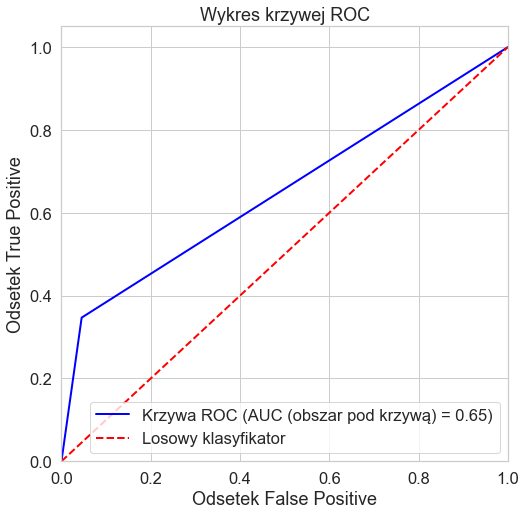

Pole pod krzywą ROC - AUC: 0.65
Współczynnik Giniego: 0.30


In [90]:
#Wywołanie funkcji do oceny modelu  
ocena_modelu(y_vali, y_pred)


Wykres Krzywej ROC jest najbardziej oddalony od lini losowego klasyfikatora w początkowym fragmencie i osiąga maksimum około pierwszej ćwiartki wykresu. Wskazuje to, że szukany optymalny punkt odcięcia (wyznaczony w kolejnym etapie) będzie znajdował się w tym obszarze.<br>
Wartość AUC oraz współczynnika Giniego są akceptowalne, choć ich wartości nie są bardzo duże.

<a class="anchor" id="model_fin"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin"></a>
### Model finalny

In [91]:
y_pred_fin = model.predict(x_test[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych

<a class="anchor" id="ocena_fin"></a>
### Ocena modelu dla zbioru testowego

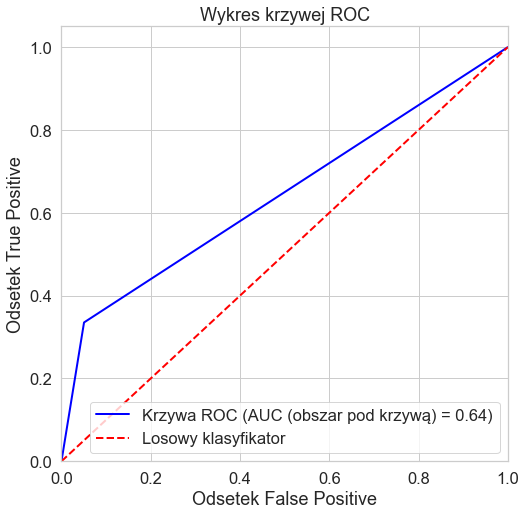

Pole pod krzywą ROC - AUC: 0.64
Współczynnik Giniego: 0.28


In [92]:
ocena_modelu(y_test, y_pred_fin)

Jak widać finalny model klasyfikatora ma prawie identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego i moża je uznać za zadawalające. Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany i powinien uzyskiwać podobne wyniki na rzeczywistych danych.

<a class="anchor" id="punkt"></a>
### Wyznaczanie optymalnego punktu odcięcia

In [93]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_fin, 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 15860, któremu odpowiada punkt odcięcia: 0.0.


<a class="anchor" id="ocena_punkt"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

In [94]:
#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.67      0.34      0.45      1208

    accuracy                           0.81      5141
   macro avg       0.75      0.64      0.66      5141
weighted avg       0.79      0.81      0.78      5141

Dokładność: 0.81
Błąd: 0.19
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3734               199
Prawdziwe "1"               803               405


<a class="anchor" id="rentownosc"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [95]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('- Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('- Wartość uzyskanego dochodu: ', max_dochod)

print('- Ilość badanych klientów:', tn + fn + fp + tp)
print('- Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('- Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

- Rentowność: 3.5%
- Wartość uzyskanego dochodu:  15860
- Ilość badanych klientów: 5141
- Ilość klientów sklasyfikowanych jako wiarygodnych: 4537
- Ilość klientów sklasyfikowanych jako niewiarygodnych: 604
- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 3734
- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 803
- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 199
- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 405


<font color='gray'>
Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że jakość modelu biorąc pod uwagę uzyskany dochód z całego portfela kredytów jest gorszy od modelu podstawowego. 
 </font>

<a class="anchor" id="inne_doch"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu

In [96]:
punkt_odciecia_fin_rf, max_dochod_rf, dochody_rf = punkt_odciecia_fin, max_dochod, dochody

In [97]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_rf_15_75, max_dochod_rf_15_75, dochody_rf_15_75 = punkt_odciecia(y_test, y_pred_fin, 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_rf_15_75, punkt_odciecia_fin_rf_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_rf_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: -4215, któremu odpowiada punkt odcięcia: 0.0.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.67      0.34      0.45      1208

    accuracy                           0.81      5141
   macro avg       0.75      0.64      0.66      5141
weighted avg       0.79      0.81      0.78      5141

Dokładność: 0.81
Błąd: 0.19
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3734               199
Prawdziwe "1"               803               405

 Rentowność: -0.93%


In [98]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_rf_10_75, max_dochod_rf_10_75, dochody_rf_10_75 = punkt_odciecia(y_test, y_pred_fin, 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_rf_10_75, punkt_odciecia_fin_rf_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_rf_10_75)

#Założone wartości zysku i straty
zysk = 10
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: -22885, któremu odpowiada punkt odcięcia: 0.0.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3933
           1       0.67      0.34      0.45      1208

    accuracy                           0.81      5141
   macro avg       0.75      0.64      0.66      5141
weighted avg       0.79      0.81      0.78      5141

Dokładność: 0.81
Błąd: 0.19
Specyficzność: 0.95
Czułość: 0.34
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              3734               199
Prawdziwe "1"               803               405

 Rentowność: -5.04%


<a class="anchor" id="model_light"></a>
## Model LightGBM
[Back to the table of contents](#toc)

<a class="anchor" id="hiperparametry_tree"></a>
### Optymalizacja hiperparametrów modelu
Przed przystąpieniem do budowy modelu został przeprowadzony dobór hiperparamterów z zastosowaniem metody losowego doboru przy pomocy funkcji RandomizedSearchCV.

In [99]:
#określenie zakresów możliwych wartości hiperparametrów
parametry_lgb = {
                'n_estimators' : randint(50, 500),
                'max_depth' : randint(2, 10),
                'learning_rate' : uniform(loc = 0, scale = 1),
                'min_child_weight' : randint(1, 5),
                'subsample': uniform(loc = 0, scale = 1),
                'colsample_bytree': uniform(loc = 0, scale = 1),
                'reg_alpha' : uniform(loc = 0, scale = 1),
                'reg_lambda' : uniform(loc = 0, scale = 1),    
                'boosting_type' : ['gbdt', 'dart', 'goss', 'rf'],
                'n_jobs' : [2]
                };

In [100]:
#po jednym wyznaczeniu najlepszych parametrów zaznaczenie poniższego kodu żeby się nie wykonywał bo trwa to długo
'''
wybrane_parametry_lgb = losowa_optymalizacja_hp(x_train, y_train, parametry_lgb, lgb.LGBMClassifier(), n_iter=20, n_jobs = 2, cv = 5)
wybrane_parametry_lgb
'''

'\nwybrane_parametry_lgb = losowa_optymalizacja_hp(x_train, y_train, parametry_lgb, lgb.LGBMClassifier(), n_iter=20, n_jobs = 2, cv = 5)\nwybrane_parametry_lgb\n'

In [101]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#1 zestaw
wybrane_parametry_lgb1 = {
                         'boosting_type': 'dart',
                         'colsample_bytree': 0.6788167768558275,
                         'learning_rate': 0.23796503105661648,
                         'max_depth': 2,
                         'min_child_weight': 3,
                         'n_estimators': 258,
                         'n_jobs': 2,
                         'reg_alpha': 0.2350667112299657,
                         'reg_lambda': 0.4612776047061984,
                         'subsample': 0.2632261204502928
                         };


In [102]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#2 zestaw
wybrane_parametry_lgb2 = {
                         'boosting_type': 'dart',
                         'colsample_bytree': 0.7744419993090215,
                         'learning_rate': 0.07368636063550338,
                         'max_depth': 8,
                         'min_child_weight': 2,
                         'n_estimators': 489,
                         'n_jobs': 2,
                         'reg_alpha': 0.9996185067696776,
                         'reg_lambda': 0.0977974819384233,
                         'subsample': 0.6327500540960664
                         };


In [103]:
#wybór odpowiedniego zestawu hiperparametrów dla modelu
wybrane_parametry_lgb = wybrane_parametry_lgb1

<a class="anchor" id="budowa"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm LightGBM.


In [104]:
model = lgb.LGBMClassifier(**wybrane_parametry_lgb) #wykonanie modelu dla danych uczących
model.fit(x_train[atrybuty_wybrane], y_train.values.ravel())
y_pred = model.predict_proba(x_vali[atrybuty_wybrane])#sprawdzenie modelu dla danych walidacyjnych
y_pred = y_pred[:, 1] #przepisanie tylko kolumny z danymi zmiennej celu

<a class="anchor" id="ocena"></a>
### Ocena modelu dla zbioru walidacyjnego

In [105]:
#ocena istotności atrybutów
pd.DataFrame(model.feature_importances_, index = x_train[atrybuty_wybrane].columns)\
                                                        .sort_values(by = 0, ascending = False)

,0
splata_wrz_bin,118
wyciag_wrz,101
splata_sie,61
limit_kredytu_bin,49
splata_wrz,45
splata_lip,30
platnosc_sie,28
wyciag_lip,26
wiek,26
wyciag_kwi,24


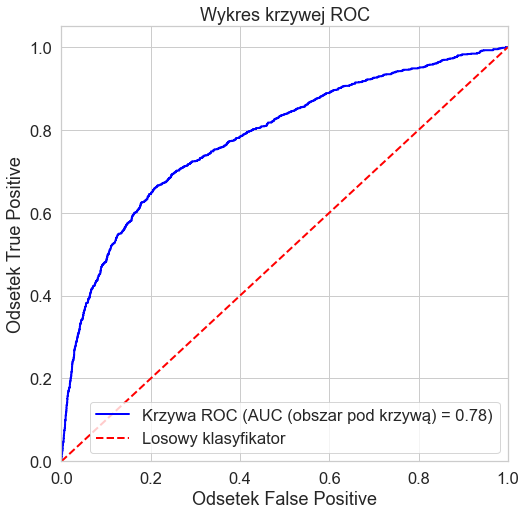

Pole pod krzywą ROC - AUC: 0.78
Współczynnik Giniego: 0.56


In [106]:
#Wywołanie funkcji do oceny modelu  
ocena_modelu(y_vali, y_pred)


Wykres Krzywej ROC jest najbardziej oddalony od lini losowego klasyfikatora w początkowym fragmencie i osiąga maksimum około pierwszej ćwiartki wykresu. Wskazuje to, że szukany optymalny punkt odcięcia (wyznaczony w kolejnym etapie) będzie znajdował się w tym obszarze.<br>
Wartość AUC oraz współczynnika Giniego są akceptowalne, choć ich wartości nie są bardzo duże.

<a class="anchor" id="model_fin"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin"></a>
### Model finalny

In [107]:
y_pred_fin = model.predict_proba(x_test[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych
y_pred_fin = y_pred_fin[:, 1] #przepisanie tylko kolumny z danymi zmiennej celu

<a class="anchor" id="ocena_fin"></a>
### Ocena modelu dla zbioru testowego

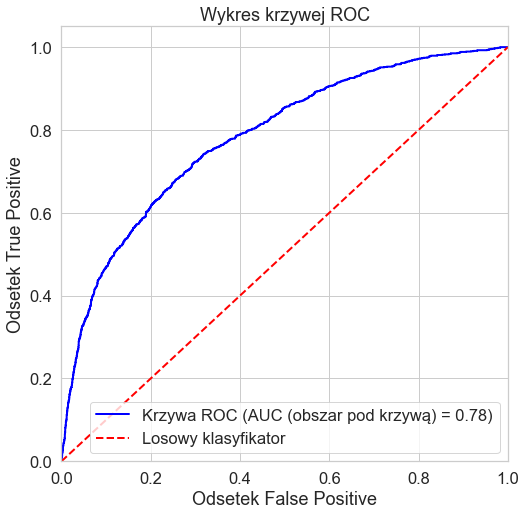

Pole pod krzywą ROC - AUC: 0.78
Współczynnik Giniego: 0.56


In [108]:
ocena_modelu(y_test, y_pred_fin)

Jak widać finalny model klasyfikatora ma prawie identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego i moża je uznać za zadawalające. Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany i powinien uzyskiwać podobne wyniki na rzeczywistych danych.

<a class="anchor" id="punkt"></a>
### Wyznaczanie optymalnego punktu odcięcia

In [109]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_fin, 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 24655, któremu odpowiada punkt odcięcia: 0.19.


<a class="anchor" id="ocena_punkt"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

In [110]:
#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      3933
           1       0.43      0.72      0.54      1208

    accuracy                           0.71      5141
   macro avg       0.66      0.71      0.66      5141
weighted avg       0.78      0.71      0.73      5141

Dokładność: 0.71
Błąd: 0.29
Specyficzność: 0.71
Czułość: 0.72
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2777              1156
Prawdziwe "1"               340               868


<a class="anchor" id="rentownosc"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [111]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('- Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('- Wartość uzyskanego dochodu: ', max_dochod)

print('- Ilość badanych klientów:', tn + fn + fp + tp)
print('- Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('- Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

- Rentowność: 7.91%
- Wartość uzyskanego dochodu:  24655
- Ilość badanych klientów: 5141
- Ilość klientów sklasyfikowanych jako wiarygodnych: 3117
- Ilość klientów sklasyfikowanych jako niewiarygodnych: 2024
- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 2777
- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 340
- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 1156
- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 868


<font color='gray'>
Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że jakość modelu biorąc pod uwagę uzyskany dochód z całego portfela kredytów jest lepszy niż dla modelu podstawowego. 
 </font>

<a class="anchor" id="inne_doch"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu

In [112]:
punkt_odciecia_fin_lgb, max_dochod_lgb, dochody_lgb = punkt_odciecia_fin, max_dochod, dochody

In [113]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_lgb_15_75, max_dochod_lgb_15_75, dochody_lgb_15_75 = punkt_odciecia(y_test, y_pred_fin, 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_lgb_15_75, punkt_odciecia_fin_lgb_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_lgb_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 16770, któremu odpowiada punkt odcięcia: 0.18.

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      3933
           1       0.42      0.74      0.53      1208

    accuracy                           0.69      5141
   macro avg       0.66      0.71      0.65      5141
weighted avg       0.78      0.69      0.72      5141

Dokładność: 0.69
Błąd: 0.31
Specyficzność: 0.68
Czułość: 0.74
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2673              1260
Prawdziwe "1"               311               897

 Rentowność: 5.62%


In [114]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_lgb_10_75, max_dochod_lgb_10_75, dochody_lgb_10_75 = punkt_odciecia(y_test, y_pred_fin, 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_lgb_10_75, punkt_odciecia_fin_lgb_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_lgb_10_75)

#Założone wartości zysku i straty
zysk = 10
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 7200, któremu odpowiada punkt odcięcia: 0.12.

              precision    recall  f1-score   support

           0       0.93      0.40      0.56      3933
           1       0.32      0.91      0.47      1208

    accuracy                           0.52      5141
   macro avg       0.62      0.65      0.51      5141
weighted avg       0.79      0.52      0.54      5141

Dokładność: 0.52
Błąd: 0.48
Specyficzność: 0.4
Czułość: 0.91
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              1575              2358
Prawdziwe "1"               114              1094

 Rentowność: 4.26%


<a class="anchor" id="model_cat"></a>
## Model CATBoost
[Back to the table of contents](#toc)

<a class="anchor" id="hiperparametry_tree"></a>
### Optymalizacja hiperparametrów modelu
Przed przystąpieniem do budowy modelu został przeprowadzony dobór hiperparamterów z zastosowaniem metody losowego doboru przy pomocy funkcji RandomizedSearchCV.

In [115]:
#określenie zakresów możliwych wartości hiperparametrów
parametry_cat = {
                'n_estimators' : randint(50, 500),
                'max_depth' : randint(2, 10),
                'learning_rate' : uniform(loc = 0, scale = 1),
                'subsample': uniform(loc = 0, scale = 1),
                'reg_lambda' : uniform(loc = 0, scale = 1),    
                'boosting_type' : ['gbdt', 'dart', 'goss', 'rf']
                };

In [116]:
#po jednym wyznaczeniu najlepszych parametrów zaznaczenie poniższego kodu żeby się nie wykonywał bo trwa to długo
'''
wybrane_parametry_cat = losowa_optymalizacja_hp(x_train, y_train, parametry_cat, CatBoostClassifier(), n_iter=20, n_jobs = 2, cv = 5)
wybrane_parametry_cat
'''

'\nwybrane_parametry_cat = losowa_optymalizacja_hp(x_train, y_train, parametry_cat, CatBoostClassifier(), n_iter=20, n_jobs = 2, cv = 5)\nwybrane_parametry_cat\n'

In [117]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#1 zestaw

wybrane_parametry_cat1 = {
                         'learning_rate': 0.23796503105661648,
                         'max_depth': 2,
                         'n_estimators': 258,
                         'reg_lambda': 0.4612776047061984,
                         'subsample': 0.2632261204502928
                         };


In [118]:
#po jednym wyznaczeniu najlepszych parametrów przypisanie na stałe bo generowanie trwa długo
#2 zestaw

wybrane_parametry_cat2 = {
                         'learning_rate': 0.07368636063550338,
                         'max_depth': 8,
                         'n_estimators': 489,
                         'reg_lambda': 0.0977974819384233,
                         'subsample': 0.6327500540960664
                         };


In [119]:
#wybór odpowiedniego zestawu hiperparametrów dla modelu

wybrane_parametry_cat = wybrane_parametry_cat1

<a class="anchor" id="budowa"></a>
### Budowa modelu

Do wykonania modelu została wykorzystany algorytm LightGBM.


In [120]:
model = CatBoostClassifier() #wykonanie modelu dla danych uczących
model.fit(x_train[atrybuty_wybrane], y_train.values.ravel())
y_pred = model.predict_proba(x_vali[atrybuty_wybrane])#sprawdzenie modelu dla danych walidacyjnych
y_pred = y_pred[:, 1] #przepisanie tylko kolumny z danymi zmiennej celu

Learning rate set to 0.033132
0:	learn: 0.6754169	total: 62.3ms	remaining: 1m 2s
1:	learn: 0.6589965	total: 71.5ms	remaining: 35.7s
2:	learn: 0.6443060	total: 81.7ms	remaining: 27.2s
3:	learn: 0.6295542	total: 96ms	remaining: 23.9s
4:	learn: 0.6164188	total: 106ms	remaining: 21s
5:	learn: 0.6040023	total: 117ms	remaining: 19.4s
6:	learn: 0.5926281	total: 130ms	remaining: 18.5s
7:	learn: 0.5822140	total: 139ms	remaining: 17.3s
8:	learn: 0.5722227	total: 148ms	remaining: 16.3s
9:	learn: 0.5629863	total: 158ms	remaining: 15.6s
10:	learn: 0.5545327	total: 168ms	remaining: 15.1s
11:	learn: 0.5470563	total: 177ms	remaining: 14.6s
12:	learn: 0.5400219	total: 187ms	remaining: 14.2s
13:	learn: 0.5333394	total: 196ms	remaining: 13.8s
14:	learn: 0.5271055	total: 205ms	remaining: 13.5s
15:	learn: 0.5213303	total: 213ms	remaining: 13.1s
16:	learn: 0.5161730	total: 225ms	remaining: 13s
17:	learn: 0.5112234	total: 234ms	remaining: 12.8s
18:	learn: 0.5068839	total: 243ms	remaining: 12.5s
19:	learn: 0.

160:	learn: 0.4234867	total: 1.69s	remaining: 8.82s
161:	learn: 0.4233396	total: 1.7s	remaining: 8.8s
162:	learn: 0.4232680	total: 1.71s	remaining: 8.79s
163:	learn: 0.4232213	total: 1.72s	remaining: 8.77s
164:	learn: 0.4231343	total: 1.73s	remaining: 8.76s
165:	learn: 0.4230376	total: 1.74s	remaining: 8.75s
166:	learn: 0.4229353	total: 1.75s	remaining: 8.75s
167:	learn: 0.4228126	total: 1.76s	remaining: 8.74s
168:	learn: 0.4227065	total: 1.78s	remaining: 8.73s
169:	learn: 0.4225390	total: 1.79s	remaining: 8.73s
170:	learn: 0.4224500	total: 1.8s	remaining: 8.72s
171:	learn: 0.4223317	total: 1.81s	remaining: 8.71s
172:	learn: 0.4222077	total: 1.82s	remaining: 8.72s
173:	learn: 0.4221024	total: 1.83s	remaining: 8.7s
174:	learn: 0.4220467	total: 1.84s	remaining: 8.69s
175:	learn: 0.4219931	total: 1.85s	remaining: 8.68s
176:	learn: 0.4218534	total: 1.86s	remaining: 8.67s
177:	learn: 0.4216591	total: 1.88s	remaining: 8.67s
178:	learn: 0.4214415	total: 1.89s	remaining: 8.66s
179:	learn: 0.42

323:	learn: 0.4051995	total: 3.51s	remaining: 7.32s
324:	learn: 0.4050856	total: 3.52s	remaining: 7.31s
325:	learn: 0.4049611	total: 3.53s	remaining: 7.3s
326:	learn: 0.4048610	total: 3.54s	remaining: 7.29s
327:	learn: 0.4047533	total: 3.55s	remaining: 7.28s
328:	learn: 0.4046878	total: 3.56s	remaining: 7.26s
329:	learn: 0.4045472	total: 3.57s	remaining: 7.25s
330:	learn: 0.4043963	total: 3.58s	remaining: 7.24s
331:	learn: 0.4042942	total: 3.59s	remaining: 7.23s
332:	learn: 0.4041974	total: 3.6s	remaining: 7.22s
333:	learn: 0.4040157	total: 3.62s	remaining: 7.21s
334:	learn: 0.4039340	total: 3.63s	remaining: 7.2s
335:	learn: 0.4038288	total: 3.64s	remaining: 7.19s
336:	learn: 0.4037064	total: 3.65s	remaining: 7.17s
337:	learn: 0.4036620	total: 3.65s	remaining: 7.16s
338:	learn: 0.4035343	total: 3.67s	remaining: 7.15s
339:	learn: 0.4034148	total: 3.67s	remaining: 7.13s
340:	learn: 0.4033030	total: 3.69s	remaining: 7.12s
341:	learn: 0.4032050	total: 3.7s	remaining: 7.11s
342:	learn: 0.40

485:	learn: 0.3876425	total: 5.3s	remaining: 5.6s
486:	learn: 0.3875354	total: 5.31s	remaining: 5.59s
487:	learn: 0.3874564	total: 5.32s	remaining: 5.58s
488:	learn: 0.3873489	total: 5.33s	remaining: 5.57s
489:	learn: 0.3872363	total: 5.34s	remaining: 5.55s
490:	learn: 0.3871587	total: 5.35s	remaining: 5.54s
491:	learn: 0.3870731	total: 5.36s	remaining: 5.53s
492:	learn: 0.3869854	total: 5.37s	remaining: 5.52s
493:	learn: 0.3868755	total: 5.38s	remaining: 5.51s
494:	learn: 0.3867257	total: 5.39s	remaining: 5.5s
495:	learn: 0.3866473	total: 5.4s	remaining: 5.49s
496:	learn: 0.3865545	total: 5.42s	remaining: 5.49s
497:	learn: 0.3865067	total: 5.43s	remaining: 5.47s
498:	learn: 0.3864083	total: 5.44s	remaining: 5.46s
499:	learn: 0.3863410	total: 5.45s	remaining: 5.45s
500:	learn: 0.3862824	total: 5.46s	remaining: 5.44s
501:	learn: 0.3861566	total: 5.47s	remaining: 5.43s
502:	learn: 0.3860611	total: 5.49s	remaining: 5.42s
503:	learn: 0.3859827	total: 5.5s	remaining: 5.41s
504:	learn: 0.385

646:	learn: 0.3714883	total: 7.19s	remaining: 3.92s
647:	learn: 0.3714216	total: 7.2s	remaining: 3.91s
648:	learn: 0.3713418	total: 7.21s	remaining: 3.9s
649:	learn: 0.3712745	total: 7.22s	remaining: 3.89s
650:	learn: 0.3711816	total: 7.23s	remaining: 3.87s
651:	learn: 0.3710715	total: 7.24s	remaining: 3.87s
652:	learn: 0.3709334	total: 7.25s	remaining: 3.85s
653:	learn: 0.3708138	total: 7.26s	remaining: 3.84s
654:	learn: 0.3707159	total: 7.27s	remaining: 3.83s
655:	learn: 0.3706292	total: 7.28s	remaining: 3.82s
656:	learn: 0.3705357	total: 7.29s	remaining: 3.81s
657:	learn: 0.3704856	total: 7.3s	remaining: 3.79s
658:	learn: 0.3703611	total: 7.31s	remaining: 3.78s
659:	learn: 0.3702736	total: 7.32s	remaining: 3.77s
660:	learn: 0.3701458	total: 7.33s	remaining: 3.76s
661:	learn: 0.3699965	total: 7.34s	remaining: 3.75s
662:	learn: 0.3699019	total: 7.35s	remaining: 3.74s
663:	learn: 0.3697363	total: 7.36s	remaining: 3.73s
664:	learn: 0.3695657	total: 7.38s	remaining: 3.71s
665:	learn: 0.3

812:	learn: 0.3564298	total: 8.98s	remaining: 2.06s
813:	learn: 0.3563225	total: 8.99s	remaining: 2.05s
814:	learn: 0.3562504	total: 9s	remaining: 2.04s
815:	learn: 0.3561366	total: 9.01s	remaining: 2.03s
816:	learn: 0.3560515	total: 9.02s	remaining: 2.02s
817:	learn: 0.3559754	total: 9.03s	remaining: 2.01s
818:	learn: 0.3558669	total: 9.04s	remaining: 2s
819:	learn: 0.3557670	total: 9.05s	remaining: 1.99s
820:	learn: 0.3556461	total: 9.06s	remaining: 1.98s
821:	learn: 0.3555837	total: 9.07s	remaining: 1.96s
822:	learn: 0.3555002	total: 9.08s	remaining: 1.95s
823:	learn: 0.3553968	total: 9.1s	remaining: 1.94s
824:	learn: 0.3553093	total: 9.11s	remaining: 1.93s
825:	learn: 0.3552037	total: 9.12s	remaining: 1.92s
826:	learn: 0.3551446	total: 9.13s	remaining: 1.91s
827:	learn: 0.3550371	total: 9.14s	remaining: 1.9s
828:	learn: 0.3549481	total: 9.15s	remaining: 1.89s
829:	learn: 0.3548319	total: 9.16s	remaining: 1.88s
830:	learn: 0.3547647	total: 9.18s	remaining: 1.87s
831:	learn: 0.354726

971:	learn: 0.3429360	total: 10.8s	remaining: 310ms
972:	learn: 0.3428043	total: 10.8s	remaining: 299ms
973:	learn: 0.3427557	total: 10.8s	remaining: 288ms
974:	learn: 0.3426901	total: 10.8s	remaining: 277ms
975:	learn: 0.3426262	total: 10.8s	remaining: 266ms
976:	learn: 0.3425649	total: 10.8s	remaining: 255ms
977:	learn: 0.3424133	total: 10.8s	remaining: 244ms
978:	learn: 0.3423430	total: 10.8s	remaining: 233ms
979:	learn: 0.3422373	total: 10.9s	remaining: 221ms
980:	learn: 0.3421808	total: 10.9s	remaining: 210ms
981:	learn: 0.3421430	total: 10.9s	remaining: 199ms
982:	learn: 0.3420656	total: 10.9s	remaining: 188ms
983:	learn: 0.3419889	total: 10.9s	remaining: 177ms
984:	learn: 0.3419324	total: 10.9s	remaining: 166ms
985:	learn: 0.3417635	total: 10.9s	remaining: 155ms
986:	learn: 0.3416761	total: 10.9s	remaining: 144ms
987:	learn: 0.3416131	total: 10.9s	remaining: 133ms
988:	learn: 0.3415263	total: 10.9s	remaining: 122ms
989:	learn: 0.3414984	total: 11s	remaining: 111ms
990:	learn: 0.

<a class="anchor" id="ocena"></a>
### Ocena modelu dla zbioru walidacyjnego

In [121]:
#ocena istotności atrybutów
pd.DataFrame(model.feature_importances_, index = x_train[atrybuty_wybrane].columns)\
                                                        .sort_values(by = 0, ascending = False)

,0
wyciag_wrz,7.992651
splata_wrz,5.849475
platnosc_sie,5.790344
platnosc_lip,5.765535
limit_kredytu_bin,5.672926
wiek,5.448078
splata_wrz_bin,5.178342
wyciag_kwi,4.965057
platnosc_kwi,4.908599
wyciag_sie,4.424301


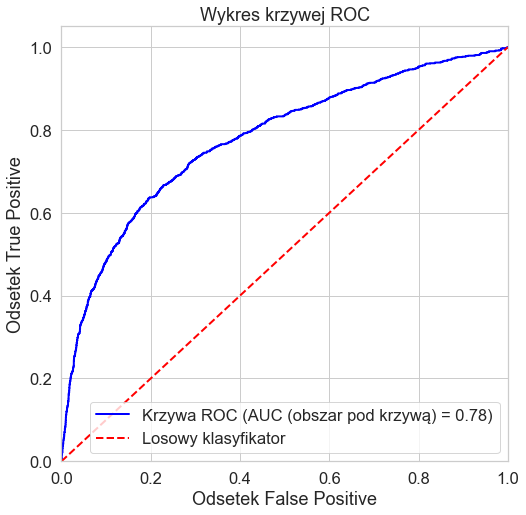

Pole pod krzywą ROC - AUC: 0.78
Współczynnik Giniego: 0.56


In [122]:
#Wywołanie funkcji do oceny modelu  
ocena_modelu(y_vali, y_pred)


Wykres Krzywej ROC jest najbardziej oddalony od lini losowego klasyfikatora w początkowym fragmencie i osiąga maksimum około pierwszej ćwiartki wykresu. Wskazuje to, że szukany optymalny punkt odcięcia (wyznaczony w kolejnym etapie) będzie znajdował się w tym obszarze.<br>
Wartość AUC oraz współczynnika Giniego są akceptowalne, choć ich wartości nie są bardzo duże.

<a class="anchor" id="model_fin"></a>
## Finalna weryfikacja jakości modelu
[Back to the table of contents](#toc)

Finalna weryfikacja modelu została przeprowadzona na zbiorze danych testowych, przy uwzględnieniu w modelowaniu  wybranych na wcześniejszym etapie atrybutów.

<a class="anchor" id="budowa_fin"></a>
### Model finalny

In [123]:
y_pred_fin = model.predict_proba(x_test[atrybuty_wybrane]) #sprawdzenie modelu dla danych walidacyjnych
y_pred_fin = y_pred_fin[:, 1] #przepisanie tylko kolumny z danymi zmiennej celu

<a class="anchor" id="ocena_fin"></a>
### Ocena modelu dla zbioru testowego

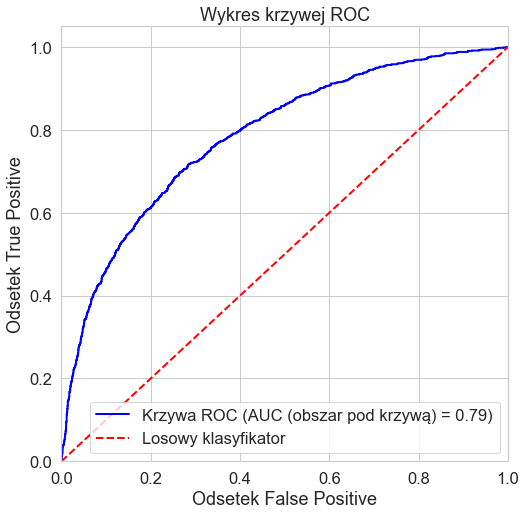

Pole pod krzywą ROC - AUC: 0.79
Współczynnik Giniego: 0.57


In [124]:
ocena_modelu(y_test, y_pred_fin)

Jak widać finalny model klasyfikatora ma prawie identyczne parametry jakości w porównaniu do wartości ze zbioru walidacyjnego i moża je uznać za zadawalające. Wyniki dla zbioru testowego nie odbiegają od wyników dla zbioru walidacyjnego więc model można uznać za nieprzetrenowany i powinien uzyskiwać podobne wyniki na rzeczywistych danych.

<a class="anchor" id="punkt"></a>
### Wyznaczanie optymalnego punktu odcięcia

In [125]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 50
punkt_odciecia_fin, max_dochod, dochody = punkt_odciecia(y_test, y_pred_fin, 15, 50)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.'
          .format(max_dochod, punkt_odciecia_fin))

Największy dochód wynosi: 25130, któremu odpowiada punkt odcięcia: 0.19.


<a class="anchor" id="ocena_punkt"></a>
### Ocena klasyfikatora z uwzględnieniem  optymalnego punktu odcięcia
 Dla obliczonej wartości punktu odcięcia wyznaczono wskaźniki jakości modelu oraz macierz pomyłek.

In [126]:
#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      3933
           1       0.44      0.72      0.54      1208

    accuracy                           0.72      5141
   macro avg       0.66      0.72      0.67      5141
weighted avg       0.78      0.72      0.73      5141

Dokładność: 0.72
Błąd: 0.28
Specyficzność: 0.71
Czułość: 0.72
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2812              1121
Prawdziwe "1"               341               867


<a class="anchor" id="rentownosc"></a>
### Podsumowanie wyników i wyznaczenie rentowności
Rentowność klasyfikatora obliczana jest z uwzględnieniem optymalnego punktu odcięcia

In [127]:
#Założone wartości zysku i straty
zysk = 15
strata = 50

print('Dla założonych zysku {} i straty {} otrzymano: \n'.format(zysk,strata))
print('- Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))
print('- Wartość uzyskanego dochodu: ', max_dochod)

print('- Ilość badanych klientów:', tn + fn + fp + tp)
print('- Ilość klientów sklasyfikowanych jako wiarygodnych:', tn + fn)
print('- Ilość klientów sklasyfikowanych jako niewiarygodnych:', fp + tp)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych:', tn)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych:', fn)
print('- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', fp)
print('- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych:', tp)

Dla założonych zysku 15 i straty 50 otrzymano: 

- Rentowność: 7.97%
- Wartość uzyskanego dochodu:  25130
- Ilość badanych klientów: 5141
- Ilość klientów sklasyfikowanych jako wiarygodnych: 3153
- Ilość klientów sklasyfikowanych jako niewiarygodnych: 1988
- Ilość wiarygodnych klientów sklasyfikowanych jako wiarygodnych: 2812
- Ilość niewiarygodnych klientów sklasyfikowanych jako wiarygodnych: 341
- Ilość wiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 1121
- Ilość niewiarygodnych klientów sklasyfikowanych jako niewiarygodnych: 867


<font color='gray'>
Na podstawie przeprowadzonej analizy wykonanego modelu można stwierdzić, że jakość modelu biorąc pod uwagę uzyskany dochód z całego portfela kredytów jest lepszy od modelu podstawowego. 
 </font>

<a class="anchor" id="inne_doch"></a>
### Wyznaczenie dochodów dla innych zysków i strat dla modelu

In [128]:
punkt_odciecia_fin_cat, max_dochod_cat, dochody_cat = punkt_odciecia_fin, max_dochod, dochody

In [129]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 15 i straty równej 75
punkt_odciecia_fin_cat_15_75, max_dochod_cat_15_75, dochody_cat_15_75 = punkt_odciecia(y_test, y_pred_fin, 15, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_cat_15_75, punkt_odciecia_fin_cat_15_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_cat_15_75)

#Założone wartości zysku i straty
zysk = 15
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 17235, któremu odpowiada punkt odcięcia: 0.16.

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      3933
           1       0.40      0.78      0.52      1208

    accuracy                           0.67      5141
   macro avg       0.65      0.71      0.64      5141
weighted avg       0.78      0.67      0.69      5141

Dokładność: 0.67
Błąd: 0.33
Specyficzność: 0.64
Czułość: 0.78
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              2504              1429
Prawdziwe "1"               271               937

 Rentowność: 6.21%


In [130]:
#Wyznaczenie punktu odcięcia i maksymalnego dochodu dla zysku równego 10 i straty równej 75
punkt_odciecia_fin_cat_10_75, max_dochod_cat_10_75, dochody_cat_10_75 = punkt_odciecia(y_test, y_pred_fin, 10, 75)
print('Największy dochód wynosi: {}, któremu odpowiada punkt odcięcia: {}.\n'
          .format(max_dochod_cat_10_75, punkt_odciecia_fin_cat_10_75))

#Wywołanie funkcji do wyznaczenia wskaźników modelu
tn, fp, fn, tp, dokladnosc, blad, specyficznosc, czulosc, macierz_pomylek = wskazniki_modelu(y_test, y_pred_fin, punkt_odciecia_fin_cat_10_75)

#Założone wartości zysku i straty
zysk = 10
strata = 75
print('\n Rentowność: {}%'.format(((tn * zysk + fn * -strata)/(tn + fn)).round(2)))

Największy dochód wynosi: 7320, któremu odpowiada punkt odcięcia: 0.11.

              precision    recall  f1-score   support

           0       0.93      0.43      0.58      3933
           1       0.32      0.90      0.48      1208

    accuracy                           0.54      5141
   macro avg       0.63      0.66      0.53      5141
weighted avg       0.79      0.54      0.56      5141

Dokładność: 0.54
Błąd: 0.46
Specyficzność: 0.43
Czułość: 0.9
               Prognozowane "0"  Prognozowane "1"
Prawdziwe "0"              1677              2256
Prawdziwe "1"               126              1082

 Rentowność: 4.06%


<a class="anchor" id="porownanie_doch_dodatkowe"></a>
## Porównanie dochodów osiąganych przez dodatkowe modele 
[Back to the table of contents](#toc)

W celu porównania osiąganych wyników przez zbudowane modele zostały wykonane krzywe dochodów w zależności od punktów odcięcia.
Dodatkowo zostały dodane krzywe dochodów przy zmienionych wartościach zysku i straty. 

### Regresja logistyczna / XGBoost

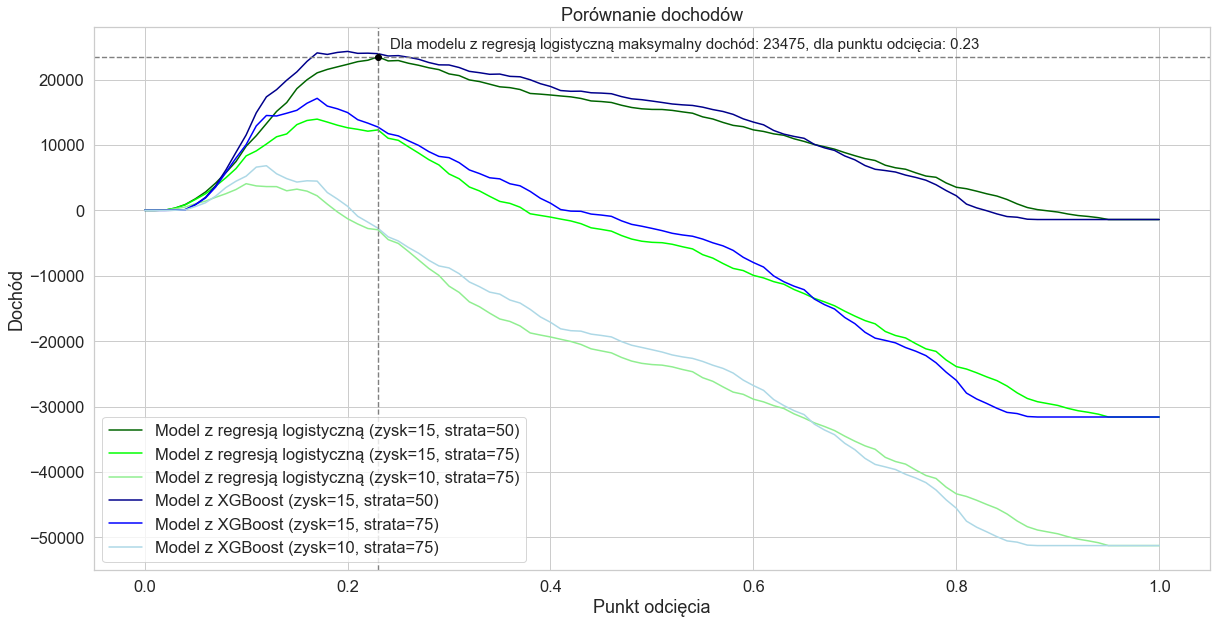

In [131]:
porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_xgb, dochody_xgb_15_75, dochody_xgb_10_75, 
                    tekst1='regresją logistyczną', tekst2='XGBoost')
            

### Regresja logistyczna / Drzewo decyzyjne

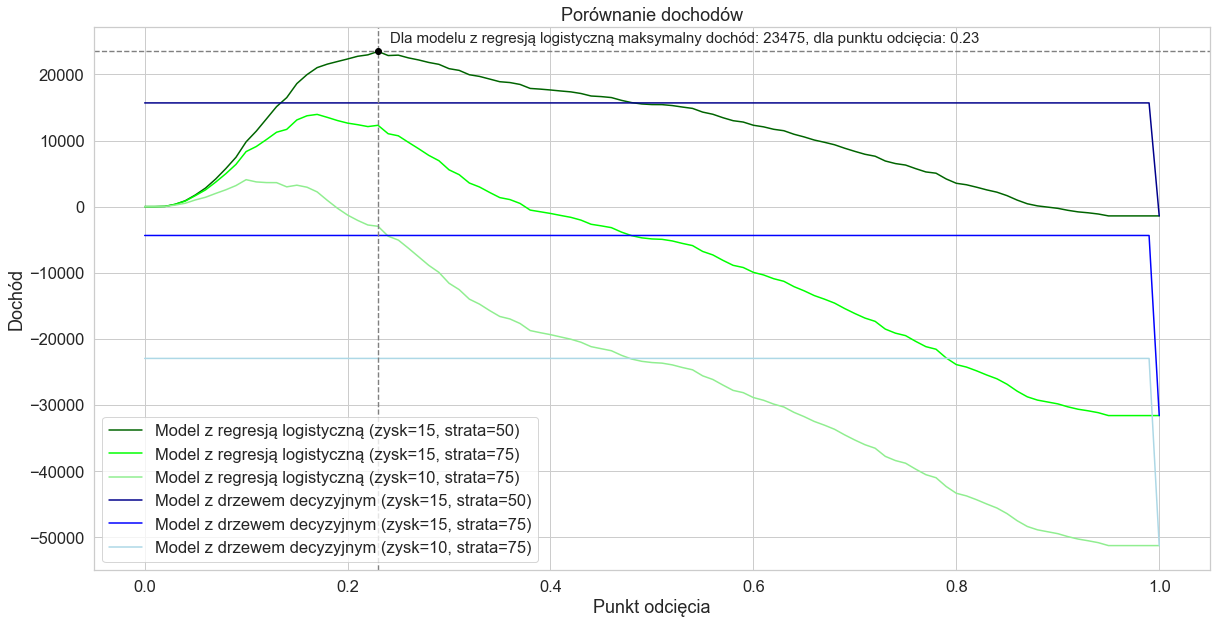

In [132]:
porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_tree, dochody_tree_15_75, dochody_tree_10_75, 
                    tekst1='regresją logistyczną', tekst2='drzewem decyzyjnym')
            

### Regresja logistyczna / las losowy

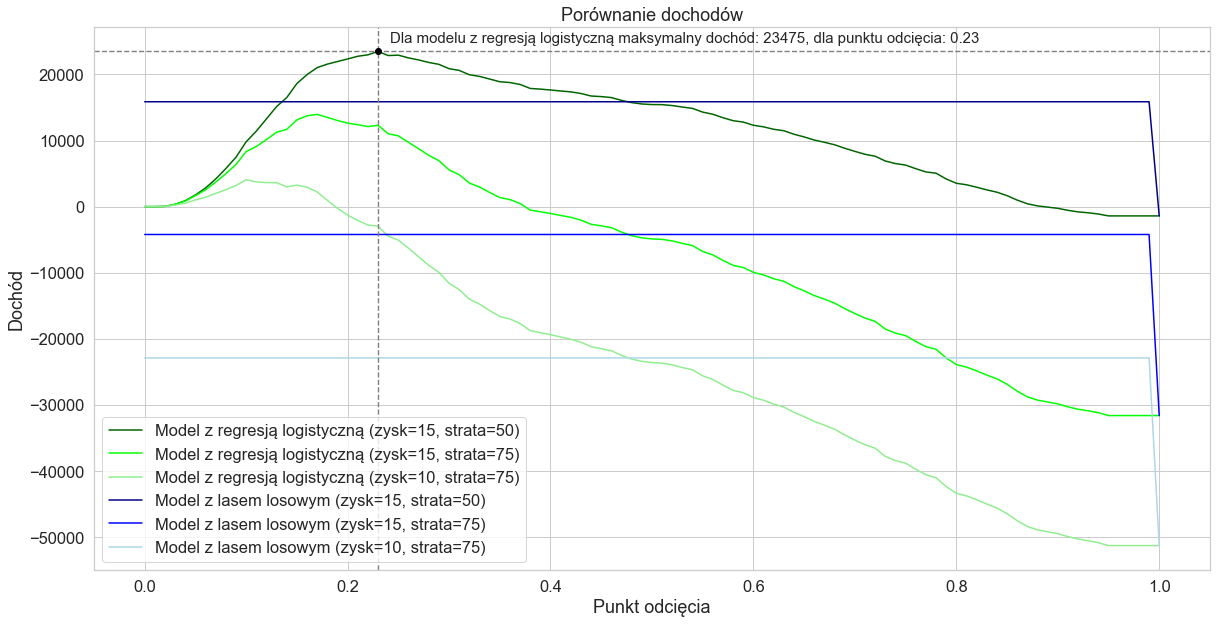

In [133]:
porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_rf, dochody_rf_15_75, dochody_rf_10_75, 
                    tekst1='regresją logistyczną', tekst2='lasem losowym')
            

### Regresja logistyczna / LightGBM

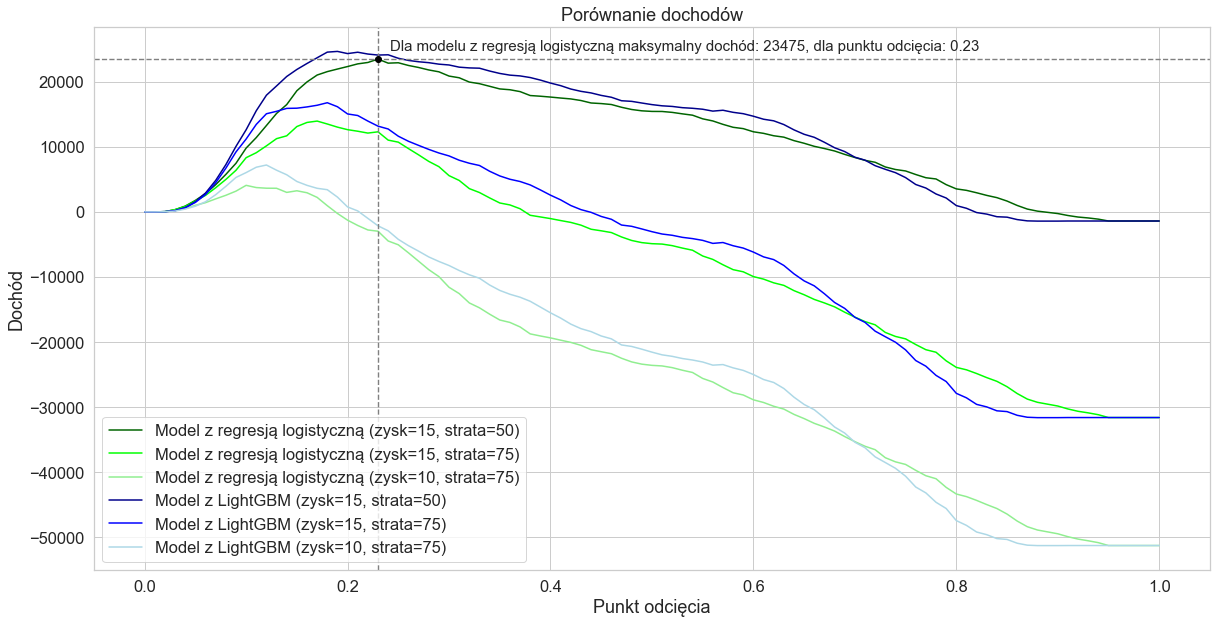

In [134]:
porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_lgb, dochody_lgb_15_75, dochody_lgb_10_75, 
                    tekst1='regresją logistyczną', tekst2='LightGBM')
            

### Regresja logistyczna / CatBoost

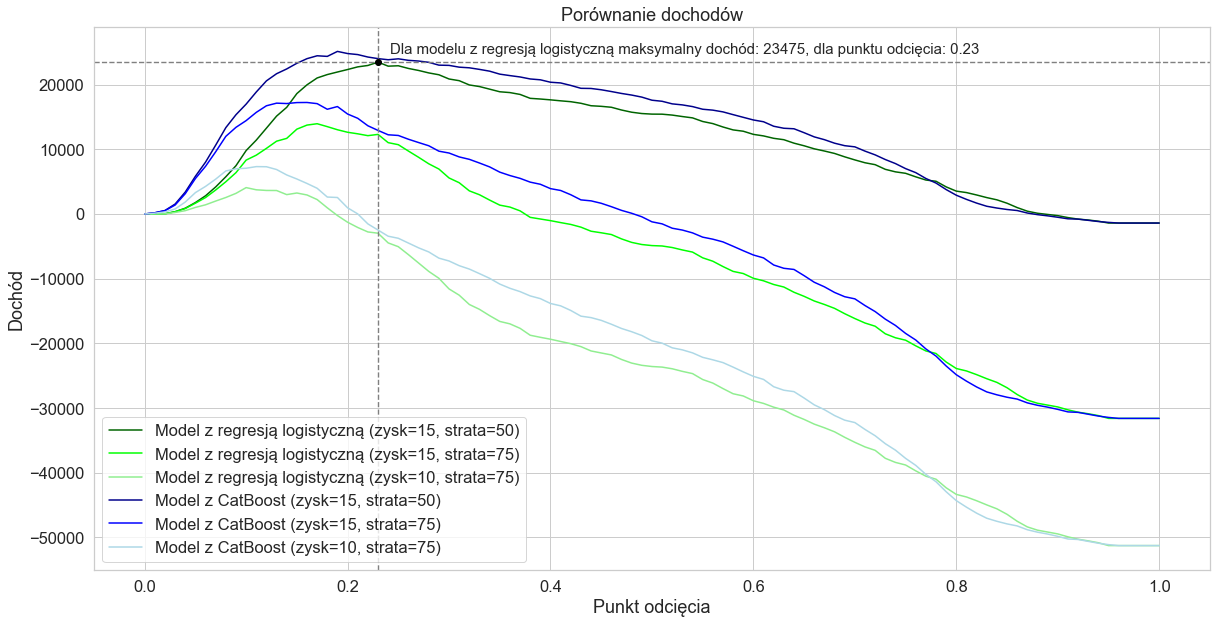

In [135]:
porownianie_dochodu(punkt_odciecia_fin_rl, max_dochod_rl, dochody_rl, dochody_rl_15_75, dochody_rl_10_75, 
                    dochody_cat, dochody_cat_15_75, dochody_cat_10_75, 
                    tekst1='regresją logistyczną', tekst2='CatBoost')
            

Na podstawie powyższych wykresów i wyznaczonych dochodów maksymalnych i rentowności widać, że lepsze parametry od modelu podstawowego z regresją logistyczną miały kolejno algorytmy CatBoost, LightGBM, XGBoost. Różnice te nie były jednak znaczące.<br>
Natomiast dla algorytmów drzewa decyzyjnego i lasów losowych wyniki były znacznie gorsze od modelu podstawowego.